In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import datetime
from datetime import datetime,timedelta, date, time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
custom_syle = {'axes.grid': False,'xtick.bottom': True,
               'ytick.left': True, 'patch.edgecolor': 'black',
              'patch.force_edgecolor': False}

sns.set_style('darkgrid', rc= custom_syle)
plt.style.use('dark_background')

In [3]:
sleep_csv = 'SLEEP_1637833139997.csv'
ex_csv = 'HEARTRATE_AUTO_1637833140062.csv'
age_csv = 'USER_1637231181665.csv'
num_of_days_to_show = 7

# <u>Prepping Sleep Data<u>

In [4]:
def convert_time(time_lst:list):
    morning =[] 
    evening = [] 
    converted_times = [] 
    
    for i in range(len(time_lst)):

        if 0 <= time_lst[i].hour <= 12:
            morning.append(1)

        elif 12 < time_lst[i].hour <= 23:
            evening.append(1)
     
    for i in range(len(time_lst)):

        if time_lst[i].hour == 0:
            converted_time = 24*60 + time_lst[i].minute
#                 print(converted_time)
            converted_times.append(converted_time)
            

        elif 0 < time_lst[i].hour < 12:
            converted_time = (24+ time_lst[i].hour)*60 + time_lst[i].minute
#                 print(converted_time)
            converted_times.append(converted_time)
            

        else:
            converted_time = time_lst[i].hour*60 + time_lst[i].minute
#                 print(time_lst[i].hour*60 + time_lst[i].minute)
            converted_times.append(converted_time)

    return converted_times

In [5]:
#For 7,8, 9 DAYS Everything works above 7 days

In [6]:
sleep_data_all = pd.read_csv(sleep_csv)
sleep_data_all[:]

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,2021-11-14,116,203,96,2021-11-13 21:18:00+0000,2021-11-14 06:06:00+0000
1,2021-11-15,58,227,63,2021-11-14 21:30:00+0000,2021-11-15 05:35:00+0000
2,2021-11-16,98,262,2,2021-11-15 21:51:00+0000,2021-11-16 05:34:00+0000
3,2021-11-17,46,278,28,2021-11-16 22:15:00+0000,2021-11-17 05:33:00+0000
4,2021-11-18,35,371,0,2021-11-17 21:56:00+0000,2021-11-18 05:33:00+0000
5,2021-11-19,96,243,21,2021-11-18 22:13:00+0000,2021-11-19 05:43:00+0000
6,2021-11-20,37,332,21,2021-11-19 22:15:00+0000,2021-11-20 06:20:00+0000
7,2021-11-21,65,259,0,2021-11-20 22:18:00+0000,2021-11-21 05:03:00+0000
8,2021-11-22,16,270,0,2021-11-21 22:23:00+0000,2021-11-22 03:54:00+0000
9,2021-11-23,66,332,5,2021-11-22 22:59:00+0000,2021-11-23 07:10:00+0000


In [7]:
sleep_data_pp = sleep_data_all[:].reset_index()
sleep_data_pp

,index,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,0,2021-11-14,116,203,96,2021-11-13 21:18:00+0000,2021-11-14 06:06:00+0000
1,1,2021-11-15,58,227,63,2021-11-14 21:30:00+0000,2021-11-15 05:35:00+0000
2,2,2021-11-16,98,262,2,2021-11-15 21:51:00+0000,2021-11-16 05:34:00+0000
3,3,2021-11-17,46,278,28,2021-11-16 22:15:00+0000,2021-11-17 05:33:00+0000
4,4,2021-11-18,35,371,0,2021-11-17 21:56:00+0000,2021-11-18 05:33:00+0000
5,5,2021-11-19,96,243,21,2021-11-18 22:13:00+0000,2021-11-19 05:43:00+0000
6,6,2021-11-20,37,332,21,2021-11-19 22:15:00+0000,2021-11-20 06:20:00+0000
7,7,2021-11-21,65,259,0,2021-11-20 22:18:00+0000,2021-11-21 05:03:00+0000
8,8,2021-11-22,16,270,0,2021-11-21 22:23:00+0000,2021-11-22 03:54:00+0000
9,9,2021-11-23,66,332,5,2021-11-22 22:59:00+0000,2021-11-23 07:10:00+0000


In [8]:
wt_new_form = [datetime.strptime(sleep_data_pp['start'][i][0:19], '%Y-%m-%d %H:%M:%S') for i in range(len(sleep_data_pp))]
bt_new_form = [datetime.strptime(sleep_data_pp['stop'][i][0:19], '%Y-%m-%d %H:%M:%S') for i in range(len(sleep_data_pp))]

#Accounting for Time Difference 
# wt_new_form = [i + timedelta(hours=3) for i in wt_new_form]
# bt_new_form = [i + timedelta(hours=3) for i in bt_new_form]

sleep_data_pp['date'] = [str(wt_new_form[i].date()) for i in range(len(sleep_data_pp))]
wt_timestamps = [wt_new_form[i].timestamp() for i in range(len(sleep_data_pp))]
bt_timestamps = [bt_new_form[i].timestamp() for i in range(len(sleep_data_pp))]


sleep_data_pp['stop'] = bt_timestamps
sleep_data_pp['start'] = wt_timestamps

In [9]:
sleep_data_pp

,index,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,0,2021-11-13,116,203,96,1.636838e+09,1.636870e+09
1,1,2021-11-14,58,227,63,1.636925e+09,1.636954e+09
2,2,2021-11-15,98,262,2,1.637013e+09,1.637041e+09
3,3,2021-11-16,46,278,28,1.637101e+09,1.637127e+09
4,4,2021-11-17,35,371,0,1.637186e+09,1.637214e+09
5,5,2021-11-18,96,243,21,1.637274e+09,1.637301e+09
6,6,2021-11-19,37,332,21,1.637360e+09,1.637389e+09
7,7,2021-11-20,65,259,0,1.637447e+09,1.637471e+09
8,8,2021-11-21,16,270,0,1.637533e+09,1.637553e+09
9,9,2021-11-22,66,332,5,1.637622e+09,1.637651e+09


In [10]:
# sleep_data_all = pd.read_csv('SLEEP_1632808820944.csv')

#Need to only use 7 days data as that is how it will always arrive 
# sleep_data_pp = sleep_data_all[4:]

#Creating Master List of wake_times and bed_times, need this for prediction 
wake_times_dt_format = [datetime.fromtimestamp(i) for i in sleep_data_pp['stop']]
bed_times_dt_format = [datetime.fromtimestamp(i) for i in sleep_data_pp['start']]
sleep_data_pp['date'] = [datetime.strftime(i, '%d/%m/%Y') for i in wake_times_dt_format]

#Finding Sleep Duration 
sleep_data_pp['Sleep Duration Mins'] = [int(i) for i in (sleep_data_pp['stop'].values - sleep_data_pp['start'].values)/60]
sleep_data_pp['Sleep Duration Hrs'] = (sleep_data_pp['stop'].values - sleep_data_pp['start'].values)/3600

#Converting Unixtimestamps to Timestrings

sleep_data_pp['start'] = [datetime.fromtimestamp(i).strftime('%H:%M') for i in sleep_data_pp['start']]
sleep_data_pp['stop'] = [datetime.fromtimestamp(i).strftime('%H:%M') for i in sleep_data_pp['stop']]

#Converting Timestrings to Datetime format 

sleep_data_pp['start'] = [datetime.strptime(i,'%H:%M').time() for i in sleep_data_pp['start']]
sleep_data_pp['stop'] = [datetime.strptime(i,'%H:%M').time() for i in sleep_data_pp['stop']]


In [11]:
sleep_data_pp

,index,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,Sleep Duration Mins,Sleep Duration Hrs
0,0,14/11/2021,116,203,96,21:18:00,06:06:00,528,8.800000
1,1,15/11/2021,58,227,63,21:30:00,05:35:00,485,8.083333
2,2,16/11/2021,98,262,2,21:51:00,05:34:00,463,7.716667
3,3,17/11/2021,46,278,28,22:15:00,05:33:00,438,7.300000
4,4,18/11/2021,35,371,0,21:56:00,05:33:00,457,7.616667
5,5,19/11/2021,96,243,21,22:13:00,05:43:00,450,7.500000
6,6,20/11/2021,37,332,21,22:15:00,06:20:00,485,8.083333
7,7,21/11/2021,65,259,0,22:18:00,05:03:00,405,6.750000
8,8,22/11/2021,16,270,0,22:23:00,03:54:00,331,5.516667
9,9,23/11/2021,66,332,5,22:59:00,07:10:00,491,8.183333


In [12]:
sleep_data = sleep_data_pp[:]

sleep_data

,index,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,Sleep Duration Mins,Sleep Duration Hrs
0,0,14/11/2021,116,203,96,21:18:00,06:06:00,528,8.800000
1,1,15/11/2021,58,227,63,21:30:00,05:35:00,485,8.083333
2,2,16/11/2021,98,262,2,21:51:00,05:34:00,463,7.716667
3,3,17/11/2021,46,278,28,22:15:00,05:33:00,438,7.300000
4,4,18/11/2021,35,371,0,21:56:00,05:33:00,457,7.616667
5,5,19/11/2021,96,243,21,22:13:00,05:43:00,450,7.500000
6,6,20/11/2021,37,332,21,22:15:00,06:20:00,485,8.083333
7,7,21/11/2021,65,259,0,22:18:00,05:03:00,405,6.750000
8,8,22/11/2021,16,270,0,22:23:00,03:54:00,331,5.516667
9,9,23/11/2021,66,332,5,22:59:00,07:10:00,491,8.183333


In [13]:
#Converting Times to format for equations
sleep_data['start'] = convert_time(sleep_data['start'].values)
sleep_data['stop'] = convert_time(sleep_data['stop'].values)

In [14]:
#Inserting Columns for Daily + Weekly Conistency and SDD
sleep_data.insert(8,'Daily SDD','')
sleep_data.insert(9,'Daily Sleep Consistency','')

In [15]:
sleep_data

,index,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,Sleep Duration Mins,Daily SDD,Daily Sleep Consistency,Sleep Duration Hrs
0,0,14/11/2021,116,203,96,1278,1806,528,,,8.800000
1,1,15/11/2021,58,227,63,1290,1775,485,,,8.083333
2,2,16/11/2021,98,262,2,1311,1774,463,,,7.716667
3,3,17/11/2021,46,278,28,1335,1773,438,,,7.300000
4,4,18/11/2021,35,371,0,1316,1773,457,,,7.616667
5,5,19/11/2021,96,243,21,1333,1783,450,,,7.500000
6,6,20/11/2021,37,332,21,1335,1820,485,,,8.083333
7,7,21/11/2021,65,259,0,1338,1743,405,,,6.750000
8,8,22/11/2021,16,270,0,1343,1674,331,,,5.516667
9,9,23/11/2021,66,332,5,1379,1870,491,,,8.183333


# <u>Calculating Sleep Consistency + SDD <u>

## Sleep Consistency 

In [16]:
def daily_sleep_consistency(bed_time_list:list,wake_time_list:list):
    
    import numpy as np 
    
    penalisation_factor = 5 
    bt_mean = np.mean(bed_time_list)
    wt_mean = np.mean(wake_time_list)
    
    bt_sub_mean = [] 
    wt_sub_mean = []
    
#     assert len(bed_time_list)  == 4, f" length of bed time list {len(bed_time_list)} not equal to 4"
#     assert len(wake_time_list) == 4, f" length of wake time list {len(wake_time_list)} not equal to 4"
    
    for i in range(len(bed_time_list)):
        bt_sub_mean.append(abs(bed_time_list[i] - bt_mean))
        wt_sub_mean.append(abs(wake_time_list[i] - wt_mean))
    
    avg_bt_variability = np.mean(bt_sub_mean)/bt_mean
    avg_wt_variability = np.mean(wt_sub_mean)/wt_mean
    
    daily_sleep_consistency = 100 - (((avg_bt_variability+avg_wt_variability)*100)*penalisation_factor)
    
    if daily_sleep_consistency < -100:
        daily_sleep_consistency = -100
        return round(daily_sleep_consistency,1)
    else:
        return round(daily_sleep_consistency,1)



In [17]:
# daily_cons_cols = [i for i in user_profile_data_1.columns if 'Daily Sleep Consistency'in i]
w_times_full = sleep_data['stop'].values.flatten()
b_times_full = sleep_data['start'].values.flatten()

daily_sleep_cons_lst_1 = []

for i in range(len(w_times_full)):
    
    if i == 0:
        
        w_times = [w_times_full[i]]
        b_times = [b_times_full[i]]
        daily_sleep_cons_lst_1.append(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times))
        
        print('Day ' + str(i))
        print('Wake Time Range = {}'.format(max(w_times)-min(w_times)))
        print('Bed Time Range = {}'.format(max(b_times)-min(b_times)))
        print('Wake Times', w_times)
        print('Bed Times', b_times)
        print("Daily Sleep Consistency = {}".format(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times)))
        print('\n')
    
    elif i == 1:
        
        w_times = [w_times_full[i],w_times_full[i-1]]
        b_times = [b_times_full[i],b_times_full[i-1]]
        daily_sleep_cons_lst_1.append(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times))
        
        print('Day ' + str(i))
        print('Wake Times', w_times)
        print('Bed Times', b_times)
        print('Wake Time Range = {}'.format(max(w_times)-min(w_times)))
        print('Bed Time Range = {}'.format(max(b_times)-min(b_times)))
        print("Daily Sleep Consistency = {}".format(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times)))
        print('\n')
    
    elif i == 2 :
        
        w_times = [w_times_full[i],w_times_full[i-1], w_times_full[i-2]]
        b_times = [b_times_full[i],b_times_full[i-1], b_times_full[i-2]]
        daily_sleep_cons_lst_1.append(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times))
        print('Day ' + str(i))
        print('Wake Times', w_times)
        print('Bed Times', b_times)
        print('Wake Time Range = {}'.format(max(w_times)-min(w_times)))
        print('Bed Time Range = {}'.format(max(b_times)-min(b_times)))
        print("Daily Sleep Consistency = {}".format(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times)))
        print('\n')
        
    else:
        
        w_times = [w_times_full[i],w_times_full[i-1], w_times_full[i-2], w_times_full[i-3]] 
        b_times = [b_times_full[i],b_times_full[i-1], b_times_full[i-2], b_times_full[i-3]] 
        daily_sleep_cons_lst_1.append(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times))
        print('Day ' + str(i))
        print('Wake Times', w_times)
        print('Bed Times', b_times)
        print('Wake Time Range = {}'.format(max(w_times)-min(w_times)))
        print('Bed Time Range = {}'.format(max(b_times)-min(b_times)))
        print("Daily Sleep Consistency = {}".format(daily_sleep_consistency(bed_time_list=b_times,wake_time_list=w_times)))
        print('\n')


Day 0
Wake Time Range = 0
Bed Time Range = 0
Wake Times [1806]
Bed Times [1278]
Daily Sleep Consistency = 100.0


Day 1
Wake Times [1775, 1806]
Bed Times [1290, 1278]
Wake Time Range = 31
Bed Time Range = 12
Daily Sleep Consistency = 93.3


Day 2
Wake Times [1774, 1775, 1806]
Bed Times [1311, 1290, 1278]
Wake Time Range = 32
Bed Time Range = 33
Daily Sleep Consistency = 91.4


Day 3
Wake Times [1773, 1774, 1775, 1806]
Bed Times [1335, 1311, 1290, 1278]
Wake Time Range = 33
Bed Time Range = 57
Daily Sleep Consistency = 89.2


Day 4
Wake Times [1773, 1773, 1774, 1775]
Bed Times [1316, 1335, 1311, 1290]
Wake Time Range = 2
Bed Time Range = 45
Daily Sleep Consistency = 95.0


Day 5
Wake Times [1783, 1773, 1773, 1774]
Bed Times [1333, 1316, 1335, 1311]
Wake Time Range = 10
Bed Time Range = 24
Daily Sleep Consistency = 95.1


Day 6
Wake Times [1820, 1783, 1773, 1773]
Bed Times [1335, 1333, 1316, 1335]
Wake Time Range = 47
Bed Time Range = 19
Daily Sleep Consistency = 92.8


Day 7
Wake Times 

In [18]:
sleep_data['Daily Sleep Consistency'] = daily_sleep_cons_lst_1

In [19]:
sleep_duration_full = sleep_data['Sleep Duration Hrs'].values.flatten()

## Sleep SDD

In [20]:
def daily_SDD_new(sleep_duration:int,recommended_sleep:int,previous_3_days_sleep:list):
    
    w1 = 0.13833333 
    
    sleep_duration_mins = sleep_duration*60
    recommended_sleep_duration = recommended_sleep*60
    
    recommended_sleep_4_days= recommended_sleep*(len(previous_3_days_sleep))
    
    total_previous_3_days_sleep_hours = sum(previous_3_days_sleep)
    
    sleep_debt_penalisation = (total_previous_3_days_sleep_hours-recommended_sleep_4_days)*2
    
#     assert 1 + len(previous_3_days_sleep) == 4, f"Not calcuating the last 4 days inclusive but{len(sleep_duration_mins)}"
    
    if 0 <=sleep_duration_mins<=480:
            
            if len(previous_3_days_sleep) == 0:
                
                sleep_duration_score = ((sleep_duration_mins/recommended_sleep_duration)*100)
                return round(sleep_duration_score,1)
            
            else:
                
                if sleep_debt_penalisation > 0: 
                    sleep_duration_score = ((sleep_duration_mins/recommended_sleep_duration)*100)
                    return round(sleep_duration_score,1)
                
                else:
                    sleep_duration_score = ((sleep_duration_mins/recommended_sleep_duration)*100) + sleep_debt_penalisation
                    return round(sleep_duration_score,1)

    elif 480 < sleep_duration_mins <= 540:
        
        if len(previous_3_days_sleep) == 0:
                
                sleep_duration_score = 200 - ((sleep_duration_mins/recommended_sleep_duration)*100)
                return round(sleep_duration_score,1)
            
        else:
        
            if sleep_debt_penalisation > 0:
                sleep_duration_score = 200 - ((sleep_duration_mins/recommended_sleep_duration)*100)
                return round(sleep_duration_score, 1)

            else:
                sleep_duration_score = 200 - ((sleep_duration_mins/recommended_sleep_duration)*100) + sleep_debt_penalisation
                return round(sleep_duration_score, 1)

    elif 540 < sleep_duration_mins <= 1160:
        
        if len(previous_3_days_sleep) == 0:
                s_debt_penalty = ((sleep_duration_mins/60) - recommended_sleep)*2
                sleep_duration_score = (75 - ((sleep_duration_mins-600)*w1)) + s_debt_penalty
                return round(sleep_duration_score,1)
            
        else:
        
            if sleep_debt_penalisation > 0:
                sleep_duration_score = ((75 - (sleep_duration_mins-600)*w1)) + sleep_debt_penalisation
                return round(sleep_duration_score, 1)
            
            else:
                sleep_duration_score = ((75 - (sleep_duration_mins-600)*w1)) + sleep_debt_penalisation
                return round(sleep_duration_score, 1)
        
    else:
        return round(0,1)

In [21]:
sleep_duration_full = sleep_data['Sleep Duration Hrs'].values.flatten()
rec_sleep_dur = 8
daily_SDD_scores = [] 


for i in range(len(sleep_duration_full)):
    
    if i == 0:
        
        sleep_duration = sleep_duration_full[i] 
        sleep_duration_times = []
#         print('Day ' + str(i+1))
#         print('Sleep Duration Times', sleep_duration_times)
#         print('Day ' + str(i+1), 'Sleep Duration = {}'.format(sleep_duration_scores_2[i]) )
#         print('Daily SDD = {}'.format(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times)))
#         print('\n')
        daily_SDD_scores.append(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times))
#         print(daily_SDD_scores_2)
    
    
    elif i == 1:
        sleep_duration_times = [sleep_duration_full[i-1]]
        sleep_duration = sleep_duration_full[i] 
#         print('Day ' + str(i+1))
#         print('Sleep Duration Times', sleep_duration_times)
#         print('Day ' + str(i+1), 'Sleep Duration = {}'.format(sleep_duration_scores_2[i]) )
#         print('Daily SDD = {}'.format(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times)))
#         print('\n')
        daily_SDD_scores.append(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times))
#         print(daily_SDD_scores_2)
        
    elif i == 2 :
        
        sleep_duration_times =[sleep_duration_full[i-1], sleep_duration_full[i-2]]
        sleep_duration = sleep_duration_full[i] 
        
#         print('Day ' + str(i+1))
#         print('Sleep Duration Times', sleep_duration_times)
#         print('Day ' + str(i+1), 'Sleep Duration = {}'.format(sleep_duration_scores_2[i]) )
#         print('Daily SDD = {}'.format(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times)))
#         print('\n')
        daily_SDD_scores.append(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times))
#         print(daily_SDD_scores_2)
    else:
        
        sleep_duration_times =[sleep_duration_full[i-1], sleep_duration_full[i-2], sleep_duration_full[i-3]]
        sleep_duration = sleep_duration_full[i] 
#         print('Day ' + str(i+1))
#         print('Sleep Duration Times', sleep_duration_times)
#         print('Day ' + str(i+1), 'Sleep Duration = {}'.format(sleep_duration_scores_2[i]) )
#         print('Daily SDD = {}'.format(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times)))
#         print('\n')
        daily_SDD_scores.append(daily_SDD_new(sleep_duration=sleep_duration, recommended_sleep=rec_sleep_dur,previous_3_days_sleep=sleep_duration_times))

sleep_data['Daily SDD'] = daily_SDD_scores

In [22]:
#Calculating Total Sleep Score
sleep_data['Daily Sleep Score'] = ''

for i in range(len(sleep_data)):
    sleep_data['Daily Sleep Score'].iloc[i] = round(sleep_data['Daily SDD'].iloc[i]*0.7 + sleep_data['Daily Sleep Consistency'].iloc[i]*0.3,1)

/Users/tomaszkostuch/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Final Sleep Data Table 

In [23]:
sleep_data_final = sleep_data[:]

In [24]:
sleep_data_final.insert(5,'Bed Time',sleep_data_pp['start'].values)
sleep_data_final.insert(6,'Wake Time',sleep_data_pp['stop'].values)

In [25]:
# sleep_data_final = sleep_data_final.drop('deepSleepTime',axis=1)
# sleep_data_final = sleep_data_final.drop('shallowSleepTime', axis=1)
# sleep_data_final = sleep_data_final.drop('wakeTime', axis=1)
# sleep_data_final = sleep_data_final.drop('lastSyncTime', axis = 1)
sleep_data_final = sleep_data_final.drop('start', axis = 1)
sleep_data_final = sleep_data_final.drop('stop', axis = 1)

In [26]:
sleep_data_final = sleep_data_final.rename(columns={'date':'Date'})

In [27]:
sleep_data_final

,index,Date,deepSleepTime,shallowSleepTime,wakeTime,Bed Time,Wake Time,Sleep Duration Mins,Daily SDD,Daily Sleep Consistency,Sleep Duration Hrs,Daily Sleep Score
0,0,14/11/2021,116,203,96,21:18:00,06:06:00,528,90.0,100.0,8.800000,93
1,1,15/11/2021,58,227,63,21:30:00,05:35:00,485,99.0,93.3,8.083333,97.3
2,2,16/11/2021,98,262,2,21:51:00,05:34:00,463,96.5,91.4,7.716667,95
3,3,17/11/2021,46,278,28,22:15:00,05:33:00,438,91.2,89.2,7.300000,90.6
4,4,18/11/2021,35,371,0,21:56:00,05:33:00,457,93.4,95.0,7.616667,93.9
5,5,19/11/2021,96,243,21,22:13:00,05:43:00,450,91.0,95.1,7.500000,92.2
6,6,20/11/2021,37,332,21,22:15:00,06:20:00,485,95.8,92.8,8.083333,94.9
7,7,21/11/2021,65,259,0,22:18:00,05:03:00,405,82.8,91.2,6.750000,85.3
8,8,22/11/2021,16,270,0,22:23:00,03:54:00,331,65.6,85.5,5.516667,71.6
9,9,23/11/2021,66,332,5,22:59:00,07:10:00,491,90.4,75.2,8.183333,85.8


## <u>Average Sleep Duration Per Night <u>

In [28]:
avg_sleep_perf = np.mean(sleep_data_final['Daily Sleep Score'].values)

lower_bound_sp = round(avg_sleep_perf - np.std(sleep_data_final['Daily Sleep Score'].values))

upper_bound_sp = round(avg_sleep_perf + np.std(sleep_data_final['Daily Sleep Score'].values))

typical_range_sp = str(lower_bound_sp) + ' - ' + str(upper_bound_sp)

typical_range_sp

'82 - 96'

## <u>Average Sleep Duration Per Night <u>

In [29]:
#Avg Sleep Duration based on all data  

avg_sleep_dur = round(np.mean(sleep_data_final['Sleep Duration Hrs']),1)
avg_sleep_string_form = str(avg_sleep_dur)[0] + ' Hours ' + str(int(float(str(avg_sleep_dur)[1:])*60)) + ' Mins'

print('All Data: Avg Sleep Duration= {}'.format(avg_sleep_string_form))
print('\n')
avg_sleep_dur_past7 = round(np.mean(sleep_data_final['Sleep Duration Hrs'][-7:]),1)
avg_sleep_string_form_past7 = str(avg_sleep_dur_past7)[0] + ' Hours ' + str(int(float(str(avg_sleep_dur_past7)[1:])*60)) + ' Mins'

print('Past {} Days: Avg Sleep Duration = {}'.format(len(sleep_data_final['Sleep Duration Hrs'][-7:]), avg_sleep_string_form_past7))

lower_bound = avg_sleep_dur - np.std(sleep_data_final['Sleep Duration Hrs'].values)

upper_bound = avg_sleep_dur + np.std(sleep_data_final['Sleep Duration Hrs'].values)

lower_bound_str = str(lower_bound)[0] + ' Hours ' + str(int(float(str(lower_bound)[1:])*60)) + ' mins'

upper_bound_str = str(upper_bound)[0] + ' Hours ' + str(int(float(str(upper_bound)[1:])*60)) + ' mins'

typical_range = lower_bound_str + ' - ' + upper_bound_str

All Data: Avg Sleep Duration= 7 Hours 36 Mins


Past 7 Days: Avg Sleep Duration = 7 Hours 18 Mins


## Prepping Data for Graphs 

In [30]:
#Preppring data for line of best wake up time based on avg sleep time 

#Finding Mean Sleep Time
mean = str(round(np.mean(sleep_data['start'])/60,2))

mean_time = mean[0:2]+ ':' + str(round(float(mean[2:5])*60))

mean_time

#Time to wake up = mean_time + 8 hours
optimal_wake_time = '06:31'


In [31]:
#MASTER VARIABLE TO CHANGE WHICH DECIDES HOW MANY OF THE PAST DAYS TO SHOW IN SLEEP CONSISTENCY 

bed_times = sleep_data_pp['start'][-num_of_days_to_show:].values
wake_times = sleep_data_pp['stop'][-num_of_days_to_show:].values

#Formating wake and bed times and sleep duration for graph 
time_lst = []
for i in range(len(bed_times)):
    
    if int(bed_times[i].strftime('%H%M'))/100 >=12:
        time_lst.append((int(bed_times[i].strftime('%H%M'))/100)-24)
    else:
        time_lst.append((int(bed_times[i].strftime('%H%M'))/100))
        
final_b_times = [] 
for i in range(len(time_lst)):
    if time_lst[i] > 0:
        final_b_times.append((8-time_lst[i])*-1)
    else:
        final_b_times.append((time_lst[i]-8))

#Ready to go 
w_times = [int(i.strftime('%H%M'))/100 for i in wake_times]
adj_w_times = [i-8 for i in w_times] #Correcting for scaling the graph 


sleep_dur_times = [str(round(i,1)) + ' Hours' for i in sleep_data['Sleep Duration Hrs'].values]
sleep_dur_times

bed_time_labels = [str(i)[0:5] for i in bed_times]
wake_time_labels = [str(i)[0:5] for i in wake_times]

# Plotting Sleep Consistency Graph 

In [32]:
#For 3-7 Days graph needs these adjustments:

#Remove:
#plt.gcf().subplots_adjust(left=0.2, right=0.5)
#ax.bar(0,0)


#For 2 Days graph needs these adjustments:

#Insert:
#plt.gcf().subplots_adjust(left=0.2, right=0.5)
#PLOT ax.bar(0,0)


#For 1 Day graph needs these adjustments:

#Insert:
#PLOT ax.bar(0,0)

In [33]:
#Creating axis labels and annotation labels
sleep_dur_labels = [str(i)[0] + ' Hours' + '\n' + str(int(float(str(i)[1:])*60)) + ' Mins' for i in sleep_data['Sleep Duration Hrs'].values[-num_of_days_to_show:]]
date_labels = [i.strftime('%d/%m') for i in wake_times_dt_format[-num_of_days_to_show:]]
last7daylbls = [i.strftime('%A') for i in wake_times_dt_format[-num_of_days_to_show:]]
final_date_labels = [last7daylbls[i] + '\n(' + date_labels[i] + ')' for i in range(len(last7daylbls))]


sns.set_context("paper")
x = sleep_data['date'][-num_of_days_to_show:].values

#Creating axis labels and annotation labels
sleep_dur_labels = [str(i)[0] + ' Hours' + '\n' + str(int(float(str(i)[1:])*60)) + ' Mins' for i in sleep_data['Sleep Duration Hrs'].values]
date_labels = [x[i][:5] for i in range(len(x))]

assert num_of_days_to_show == len(x), f' Number of days specified ({num_of_days_to_show}) does not match the amount of data in table ({len(sleep_data)})'


y_labels = ['20:00','22:00','00:00','02:00', '04:00', '06:00', '08:00', '10:00','12:00','14:00', '16:00']
fig = plt.figure(figsize=(10,7.5))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(-8,10)
plt.xticks(rotation=0, fontsize=12.5)
plt.yticks(ticks = [-12,-10,-8,-6,-4,-2,0,2,4,6,8],labels=y_labels,fontsize=12.5)
plt.title('Sleep Consistency from {} to {}'.format(date_labels[0],date_labels[-1]), fontsize=15)
plt.xlabel('Date', labelpad=20, fontsize=15, loc='center')
plt.ylabel('Time', labelpad=40, fontsize=15, loc='center', rotation=0)
ax.bar(final_date_labels, final_b_times,color='mediumslateblue',width=bar_width_adj[num_of_days_to_show], align='center')
ax.bar(final_date_labels, adj_w_times,  color='mediumslateblue', width=bar_width_adj[num_of_days_to_show],align='center')

# plt.gcf().subplots_adjust(left=0.01, right=0.3)
# ax.bar(0,0)


#Annotate the Graph
for i in range(num_of_days_to_show):
    ax.annotate(bed_time_labels[i],xy=(i-bt_labels_adj[num_of_days_to_show],final_b_times[i]-0.6),fontsize=13)
    ax.annotate(wake_time_labels[i], xy= (i-wt_labels_adj[num_of_days_to_show],adj_w_times[i]+0.4),fontsize=13)
    ax.annotate(sleep_dur_labels[i], xy = (i-sd_labels_adj[num_of_days_to_show], (final_b_times[i]+ adj_w_times[i])+2), fontsize=12.5)

# sns.axes_style()

In [34]:
bt_labels_h = [0,0.7,0.7,0.8,0.75,0.75,0.75,0.75]
wt_labels_h = [0,0.4,0.4,0.4,0.4,0.4,0.4,0.4] 
sd_labels_h = [0,3.3,4,3.3,3.4,3.5,3.5,3.5]

bar_width_adj = [0,0.1,0.4,0.27,0.45,0.55,0.63,0.75]
bt_labels_adj = [0,0.03,0.14,.08,0.13,0.17,0.17,0.21]
wt_labels_adj = [0,0.03,0.14,0.08,0.13,0.17,0.17,0.21] 
sd_labels_adj = [0,0.04,0.19,0.11,0.16,0.22,0.26,0.32]

7


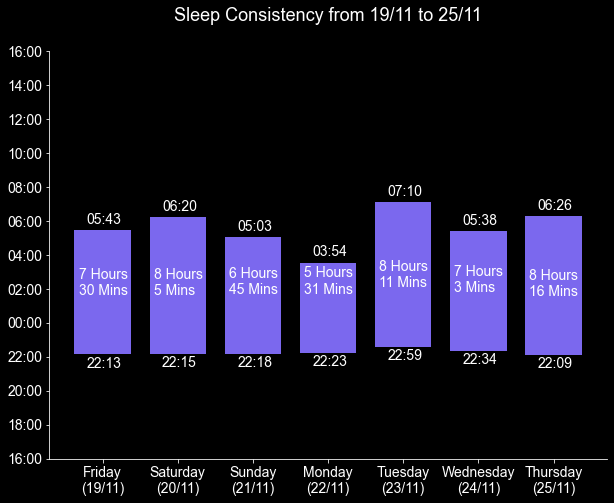

In [35]:
y_labels = ['16:00','18:00','20:00','22:00','00:00','02:00', '04:00', '06:00', '08:00', '10:00','12:00','14:00','16:00']
ytickss= [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16]

fig = plt.figure(figsize=(10,7.5))
ax = plt.subplot(111)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(-6,16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(ticks = ytickss,labels=y_labels,fontsize=14)
plt.title('Sleep Consistency from {} to {}'.format(date_labels[0],date_labels[-1]), pad=30,fontsize=18)
# plt.xlabel('Date', labelpad=20, fontsize=15, loc='center')
# plt.ylabel('Time', labelpad=40, fontsize=15, loc='center', rotation=0)
# plt.gcf().subplots_adjust(left=0.01, right=0.3)
# ax.bar(0,0)

upper = w_times
lower = time_lst
height = [upper[i] - lower[i] for i in range(len(upper))]

ax.bar(final_date_labels, height,bottom=lower,color='mediumslateblue',width=bar_width_adj[num_of_days_to_show], align='center')
ax.bar(final_date_labels, height, bottom=lower,color='mediumslateblue', width=bar_width_adj[num_of_days_to_show],align='center')

print(num_of_days_to_show)
for i in range(num_of_days_to_show):
    ax.annotate(bed_time_labels[i],xy=(i-bt_labels_adj[num_of_days_to_show],lower[i] - bt_labels_h[num_of_days_to_show]),fontsize=14)
    ax.annotate(wake_time_labels[i], xy= (i-wt_labels_adj[num_of_days_to_show], upper[i] + wt_labels_h[num_of_days_to_show]),fontsize=14)
    ax.annotate(sleep_dur_labels[-(num_of_days_to_show - i)], xy = (i-sd_labels_adj[num_of_days_to_show], (upper[i]- height[i])+ sd_labels_h[num_of_days_to_show]), fontsize=14)

# <u>Calculating Weekly Consistency + SDD <u>

In [36]:
def weekly_sleep_consistency(bed_time_list:list,wake_time_list:list):
    import numpy as np 
    
    bt_mean = np.mean(bed_time_list)
    wt_mean = np.mean(wake_time_list)
    
    bt_sub_mean = [] 
    wt_sub_mean = []
    
    assert len(bed_time_list) == len(wake_time_list), f" length of bed time list {len(bed_time_list)} not the same as wake time list {len(wake_time_list)}"
    
    for i in range(len(bed_time_list)):
        bt_sub_mean.append(abs(bed_time_list[i] - bt_mean))
        wt_sub_mean.append(abs(wake_time_list[i] - wt_mean))
    
    avg_bt_variability = np.mean(bt_sub_mean)/bt_mean
    avg_wt_variability = np.mean(wt_sub_mean)/wt_mean
    
    weekly_sleep_consistency = 100 - ((avg_bt_variability+avg_wt_variability)*100)*5
    
    return round(weekly_sleep_consistency,1)

In [37]:
def weekly_SDD(recommended_sleep_duration:int,weeks_sleep:list):
    
    total_weeks_sleep_hours = sum(weeks_sleep)
    total_weeks_sleep_mins = total_weeks_sleep_hours*60
    penalisation_factor = 1.5
    
    recommended_sleep_duration_mins = recommended_sleep_duration*60 
    recommended_sleep_duration_hours = recommended_sleep_duration
    
    sleep_debt_mins = total_weeks_sleep_mins-recommended_sleep_duration_mins
    sleep_debt_hours = total_weeks_sleep_hours - recommended_sleep_duration_hours
    
    
    assert len(weeks_sleep) == 7, f"Not calculating the last 7 days inclusive but{len(weeks_sleep)}"
    
    if 0 <=total_weeks_sleep_mins<=3360:
        
        weekly_SDD_score = ((total_weeks_sleep_mins/3360)*100) + (sleep_debt_hours*penalisation_factor)
        
        return round(weekly_SDD_score,1)
    
    elif 3360 < total_weeks_sleep_mins <= 5726:
        
        weekly_SDD_score = 200 - ((total_weeks_sleep_mins/3360)*100) - (sleep_debt_hours*penalisation_factor)
        return round(weekly_SDD_score,2)
    
    else:
        return round(0,1)

In [38]:
#Last 7 Days Sleep Conssistency 
past7_days_Sleep_cons = weekly_sleep_consistency(bed_time_list=list(sleep_data['start'].values[-7:]), wake_time_list=list(sleep_data['stop'].values[-7:]) )


## Weekly Sleep Dataset  

In [39]:
#Finds Weekly Data Where Possible 

if len(sleep_data)%7 == 0:
    weekly_sleep_data = pd.DataFrame()
    for i in range(len(sleep_data)//7):
#         print(test__lst[0+(i*7):7+(i*7)])
        weekly_sleep_data['Week Dates'] = [str(sleep_data['date'].values[-7]) + ' to '+ str(sleep_data['date'].values[-1])]
        weekly_sleep_data['Weekly Sleep Consistency'] = weekly_sleep_consistency(bed_time_list=sleep_data['start'][0+(i*7):7+(i*7)].values, wake_time_list=sleep_data['stop'][0+(i*7):7+(i*7)].values)
        weekly_sleep_data['Weekly SDD'] = weekly_SDD(recommended_sleep_duration=56, weeks_sleep=sleep_data['Sleep Duration Hrs'][0+(i*7):7+(i*7)].values)
        weekly_sleep_data['Weekly Sleep Debt(Hrs)'] = sum(sleep_data['Sleep Duration Hrs'][0+(i*7):7+(i*7)].values) - 56
        weekly_sleep_data['Weekly Sleep Score'] = round(weekly_sleep_data['Weekly Sleep Consistency'][i]*0.3 + weekly_sleep_data['Weekly SDD'][i]*0.7,1)
else:
    print('Do not have full {} weeks data, can only display {} weeks data'.format(int(len(sleep_data)/7+1),len(sleep_data)//7))
    weekly_sleep_data = pd.DataFrame()
    for i in range(len(sleep_data)//7):
        weekly_sleep_data['Week Dates'] = [str(sleep_data['date'].values[0+(i*7)]) + ' to '+ str(sleep_data['date'].values[6+(i*7)])]
        weekly_sleep_data['Weekly Sleep Consistency'] = weekly_sleep_consistency(bed_time_list=sleep_data['start'][0+(i*7):7+(i*7)].values, wake_time_list=sleep_data['stop'][0+(i*7):7+(i*7)].values)
        weekly_sleep_data['Weekly SDD'] = weekly_SDD(recommended_sleep_duration=56, weeks_sleep=sleep_data['Sleep Duration Hrs'][0+(i*7):7+(i*7)].values)
        weekly_sleep_data['Weekly Sleep Debt(Hrs)'] = sum(sleep_data['Sleep Duration Hrs'][0+(i*7):7+(i*7)].values) - 56
        weekly_sleep_data['Weekly Sleep Score'] = round(weekly_sleep_data['Weekly Sleep Consistency'][i]*0.3 + weekly_sleep_data['Weekly SDD'][i]*0.7,1)
        
weekly_sleep_data

Do not have full 2 weeks data, can only display 1 weeks data


,Week Dates,Weekly Sleep Consistency,Weekly SDD,Weekly Sleep Debt(Hrs),Weekly Sleep Score
0,14/11/2021 to 20/11/2021,88.9,97.0,-0.9,94.6


weekly_sleep_data = pd.DataFrame()

weekly_sleep_data['Week Dates'] = [str(sleep_data['date'].values[-7:][0]) + ' to '+ str(sleep_data['date'].values[-7:][-1])]
weekly_sleep_data['Weekly Sleep Consistency'] = weekly_sleep_consistency(bed_time_list=sleep_data['start'][-7:].values, wake_time_list=sleep_data['stop'][-7:].values)
weekly_sleep_data['Weekly SDD'] = weekly_SDD(recommended_sleep_duration=56, weeks_sleep=sleep_data['Sleep Duration Hrs'][-7:].values)
weekly_sleep_data['Weekly Sleep Debt(Hrs)'] = sum(sleep_data['Sleep Duration Hrs'][-7:].values) - 56

weekly_sleep_data['Weekly Sleep Score'] = round(weekly_sleep_data['Weekly Sleep Consistency']*0.3 + weekly_sleep_data['Weekly SDD']*0.7,1)
weekly_sleep_data

# <u>Prepping Exercise Data</u>

In [40]:
sleep_data_pp['date']

0     14/11/2021
1     15/11/2021
2     16/11/2021
3     17/11/2021
4     18/11/2021
5     19/11/2021
6     20/11/2021
7     21/11/2021
8     22/11/2021
9     23/11/2021
10    24/11/2021
11    25/11/2021
Name: date, dtype: object

In [41]:
ex_df = pd.DataFrame()

sleep_data_pp

ex_df['Date'] = sleep_data_pp['date'].values
ex_df['Bed Time'] = sleep_data_pp['start'].values
ex_df['Wake Time'] = sleep_data_pp['stop'].values
ex_df['Exercise Mins'] = ''
ex_df['Baseline HR'] = ''
ex_df['ModIntensity HR Threshold'] = ''
ex_df['VigIntensity HR Threshold'] = ''
ex_df

,Date,Bed Time,Wake Time,Exercise Mins,Baseline HR,ModIntensity HR Threshold,VigIntensity HR Threshold
0,14/11/2021,21:18:00,06:06:00,,,,
1,15/11/2021,21:30:00,05:35:00,,,,
2,16/11/2021,21:51:00,05:34:00,,,,
3,17/11/2021,22:15:00,05:33:00,,,,
4,18/11/2021,21:56:00,05:33:00,,,,
5,19/11/2021,22:13:00,05:43:00,,,,
6,20/11/2021,22:15:00,06:20:00,,,,
7,21/11/2021,22:18:00,05:03:00,,,,
8,22/11/2021,22:23:00,03:54:00,,,,
9,23/11/2021,22:59:00,07:10:00,,,,


In [42]:
#Calculating MHR and Mod and Vig Thresholdss

age_data = pd.read_csv(age_csv)
# datetime(int(age_data['birthday'][0]))
print(age_data['birthday'][0])

bday = datetime.strptime(age_data['birthday'][0], '%Y-%m')
today = date.today()

age = int(str(today)[0:4]) - int(str(bday)[0:4])


maximal_hr = 220-age
mod_thresh= int(maximal_hr*0.6)
vig_thresh =int(maximal_hr*0.75)

print('Average Mod Intensity Threshold = {}'.format(mod_thresh))
print('Average Vig Intensity Threshold = {}'.format(vig_thresh))

1989-01
Average Mod Intensity Threshold = 112
Average Vig Intensity Threshold = 141


In [43]:
# num_of_days_to_show = 7
ex_data_all = pd.read_csv(ex_csv)

#Extracting Dates and Wake Times to use in Baseline HR Calculation 
dates = sorted(list(set(ex_data_all['date'])))[:]
wake_time_int = [int(i.strftime('%H%M')) for i in ex_df['Wake Time'].values]
w_times_bhr = [(int(str(i)[0:2])*60) + (int(str(i)[3:5])) for i in ex_df['Wake Time'].values]

#Iterate through dates and bed times and new DF while filtering sleep dates from other DF
#Currently using Exercise Basline of RHR raised by 60% - Typically can be anywhere 50-75

for i in range(len(ex_df)):
    ex_df['Baseline HR'].iloc[i] = round(np.mean(ex_data_all['heartRate'][ex_data_all['date'] == dates[i]][w_times_bhr[i]:w_times_bhr[i]+15]))
    #May need to scale these back to 50% and 75% as we get more data as BHR calculation will become more accurate
    ex_df['ModIntensity HR Threshold'].iloc[i] = round(ex_df['Baseline HR'].values[i] * 1.55)
    ex_df['VigIntensity HR Threshold'].iloc[i] = round(ex_df['Baseline HR'].values[i] * 1.75)
    
for i in range(len(ex_df)):
    ex_df['Exercise Mins'].iloc[i] = len(ex_data_all[(ex_data_all['date'] == dates[i]) & (ex_data_all['heartRate'] >= round(np.mean(ex_df['ModIntensity HR Threshold'].values)))])
    
#To find Ex mins just have to filter the dataframe 

# ex_data_all[(ex_data_all['date'] == dates[0]) & (ex_data_all['heartRate'] > ex_df['ModIntensity HR Threshold'].values[0])]


# len(ex_data_all[(ex_data_all['date'] == dates[i]) & (ex_data_all['heartRate'] > round(np.mean(ex_df['ModIntensity HR Threshold'].values)))])

In [44]:
ex_df

,Date,Bed Time,Wake Time,Exercise Mins,Baseline HR,ModIntensity HR Threshold,VigIntensity HR Threshold
0,14/11/2021,21:18:00,06:06:00,9,89,138,156
1,15/11/2021,21:30:00,05:35:00,1,97,150,170
2,16/11/2021,21:51:00,05:34:00,0,72,112,126
3,17/11/2021,22:15:00,05:33:00,27,99,153,173
4,18/11/2021,21:56:00,05:33:00,22,78,121,136
5,19/11/2021,22:13:00,05:43:00,1,81,126,142
6,20/11/2021,22:15:00,06:20:00,2,62,96,108
7,21/11/2021,22:18:00,05:03:00,0,57,88,100
8,22/11/2021,22:23:00,03:54:00,0,79,122,138
9,23/11/2021,22:59:00,07:10:00,0,91,141,159


In [45]:
print('Average BHR = {}'.format(int(np.mean(ex_df['Baseline HR']))))
print('Average Mod Intensity Threshold = {}'.format(int(np.mean(ex_df['ModIntensity HR Threshold']))))
print('Average Vig Intensity Threshold = {}'.format(int(np.mean(ex_df['VigIntensity HR Threshold']))))

Average BHR = 81
Average Mod Intensity Threshold = 126
Average Vig Intensity Threshold = 142


In [46]:
#Checking correct BHR Calculation 
for i in range(len(ex_df)):
    print(dates[i] + '     Wake Time = {}'.format(sleep_data_final['Wake Time'][i]), '\n')
    print(ex_data_all[ex_data_all['date'] == dates[i]][w_times_bhr[i]:w_times_bhr[i]+15],'\n')

2021-11-14     Wake Time = 06:06:00 

           date   time  heartRate
366  2021-11-14  06:20        101
367  2021-11-14  06:21        109
368  2021-11-14  06:22        109
369  2021-11-14  06:23         84
370  2021-11-14  06:24         88
371  2021-11-14  06:25         96
372  2021-11-14  06:26         92
373  2021-11-14  06:27         87
374  2021-11-14  06:28         79
375  2021-11-14  06:29         94
376  2021-11-14  06:30         94
377  2021-11-14  06:31         80
378  2021-11-14  06:32         76
379  2021-11-14  06:33         67
380  2021-11-14  06:34         81 

2021-11-15     Wake Time = 05:35:00 

            date   time  heartRate
1731  2021-11-15  06:39        115
1732  2021-11-15  06:40        117
1733  2021-11-15  06:41        116
1734  2021-11-15  06:42        115
1735  2021-11-15  06:43        115
1736  2021-11-15  06:44        112
1737  2021-11-15  06:45         88
1738  2021-11-15  06:46         79
1739  2021-11-15  06:47         83
1740  2021-11-15  06:48     

In [47]:
mod_ex_mins = []
vig_ex_mins = [] 
for i in range(len(ex_df)):
    mod_ex_mins.append(len(ex_data_all[(ex_data_all['date'] == dates[i]) & (ex_data_all['heartRate'].between(round(np.mean(ex_df['ModIntensity HR Threshold'].values)),round(np.mean(ex_df['VigIntensity HR Threshold'].values))))]))
    vig_ex_mins.append(len(ex_data_all[(ex_data_all['date'] == dates[i]) & (ex_data_all['heartRate'] > round(np.mean(ex_df['VigIntensity HR Threshold'].values)))]))

print('Moderate Ex Mins {}'.format(mod_ex_mins))
print('Vigorous Ex Mins {}'.format(vig_ex_mins))
print('Ex Mins {}'.format(ex_df['Exercise Mins'].values))

Moderate Ex Mins [3, 1, 0, 18, 14, 1, 2, 0, 0, 0, 1, 1]
Vigorous Ex Mins [6, 0, 0, 9, 8, 0, 0, 0, 0, 0, 0, 0]
Ex Mins [9 1 0 27 22 1 2 0 0 0 1 1]


In [48]:
def daily_ex_score(vig_mins:int, mod_mins:int):
    w1 = 3.72093023
    w2 = 0.93023256
    ex_mins = (vig_mins*2) + mod_mins
    
    if 0<=ex_mins<=21.5:
        ex_score = ex_mins*w1
        return round(ex_score,1)

    elif 21.5<ex_mins<=43:
        ex_score = 80 + (ex_mins-21.5)*w2
        return round(ex_score, 1)

    else:
        return 100 

def weekly_ex_score(vig_mins:int, mod_mins:int):
    
    ex_mins =(vig_mins*2)+mod_mins
    w1 = 0.53333333
    w2 = 0.13333333
    
    if 0<=ex_mins<=150:
        ex_score = ex_mins*w1
        return round(ex_score,1)

    elif 150<ex_mins<=300:
        ex_score = 80 + (ex_mins-150)*w2
        return round(ex_score, 1)

    else:
        return 100

In [49]:
ex_df['Daily Ex Score'] = ''
ex_df['Mod Exercise Mins'] = mod_ex_mins
ex_df['Vig Exercise Mins'] = vig_ex_mins

for i in range(len(ex_df)):
    ex_df['Daily Ex Score'].iloc[i] = daily_ex_score(vig_mins=ex_df['Vig Exercise Mins'].values[i], mod_mins=ex_df['Mod Exercise Mins'].values[i])


ex_df

/Users/tomaszkostuch/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Date,Bed Time,Wake Time,Exercise Mins,Baseline HR,ModIntensity HR Threshold,VigIntensity HR Threshold,Daily Ex Score,Mod Exercise Mins,Vig Exercise Mins
0,14/11/2021,21:18:00,06:06:00,9,89,138,156,55.8,3,6
1,15/11/2021,21:30:00,05:35:00,1,97,150,170,3.7,1,0
2,16/11/2021,21:51:00,05:34:00,0,72,112,126,0,0,0
3,17/11/2021,22:15:00,05:33:00,27,99,153,173,93.5,18,9
4,18/11/2021,21:56:00,05:33:00,22,78,121,136,87.9,14,8
5,19/11/2021,22:13:00,05:43:00,1,81,126,142,3.7,1,0
6,20/11/2021,22:15:00,06:20:00,2,62,96,108,7.4,2,0
7,21/11/2021,22:18:00,05:03:00,0,57,88,100,0,0,0
8,22/11/2021,22:23:00,03:54:00,0,79,122,138,0,0,0
9,23/11/2021,22:59:00,07:10:00,0,91,141,159,0,0,0


In [50]:
#Finds Weekly Ex Data Where Possible 

if len(ex_df)%7 == 0:
    weekly_ex_data = pd.DataFrame()
    
    for i in range(len(ex_df)//7):
        
        weekly_ex_data['Week']= [str(ex_df['Date'].values[-7]) + ' to '+ str(ex_df['Date'].values[-1])]
        weekly_ex_data['Total Ex Mins'] = sum(ex_df['Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Total Vig Mins'] = sum(ex_df['Vig Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Total Mod Mins'] = sum(ex_df['Mod Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Weekly Exercise Score'] = weekly_ex_score(vig_mins = weekly_ex_data['Total Vig Mins'].values[i], mod_mins=weekly_ex_data['Total Mod Mins'].values[i])
        weekly_ex_data['Average Exercise Mins per Day'] = round(weekly_ex_data['Total Ex Mins'][i]/7,1)
else:
    print('Do not have full {} weeks data, can only display {} weeks data'.format(int(len(ex_df)/7+1),len(ex_df)//7))
    weekly_ex_data = pd.DataFrame()
    
    for i in range(len(ex_df)//7):
        weekly_ex_data['Week'] = [str(ex_df['Date'].values[0+(i*7)]) + ' to '+ str(ex_df['Date'].values[6+(i*7)])]
        weekly_ex_data['Total Ex Mins'] = sum(ex_df['Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Total Vig Mins'] = sum(ex_df['Vig Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Total Mod Mins'] = sum(ex_df['Mod Exercise Mins'][0+(i*7):7+(i*7)])
        weekly_ex_data['Weekly Exercise Score'] = weekly_ex_score(vig_mins = weekly_ex_data['Total Vig Mins'].values[i], mod_mins=weekly_ex_data['Total Mod Mins'].values[i])
        weekly_ex_data['Average Exercise Mins per Day'] = round(weekly_ex_data['Total Ex Mins'][i]/7,1)

weekly_ex_data

Do not have full 2 weeks data, can only display 1 weeks data


,Week,Total Ex Mins,Total Vig Mins,Total Mod Mins,Weekly Exercise Score,Average Exercise Mins per Day
0,14/11/2021 to 20/11/2021,62,23,39,45.3,8.9


# Final Daily Dataset 

In [51]:
wake_times_dt_format

[datetime.datetime(2021, 11, 14, 6, 6),
 datetime.datetime(2021, 11, 15, 5, 35),
 datetime.datetime(2021, 11, 16, 5, 34),
 datetime.datetime(2021, 11, 17, 5, 33),
 datetime.datetime(2021, 11, 18, 5, 33),
 datetime.datetime(2021, 11, 19, 5, 43),
 datetime.datetime(2021, 11, 20, 6, 20),
 datetime.datetime(2021, 11, 21, 5, 3),
 datetime.datetime(2021, 11, 22, 3, 54),
 datetime.datetime(2021, 11, 23, 7, 10),
 datetime.datetime(2021, 11, 24, 5, 38),
 datetime.datetime(2021, 11, 25, 6, 26)]

In [52]:
#Adding in DT formats so times can be rounded 
sleep_data_final['WT for PP'] = wake_times_dt_format
sleep_data_final['BT for PP'] = bed_times_dt_format
sleep_data_final['Sleep Debt'] = ''

for i in range(len(sleep_data_final)):
    sleep_data_final['Sleep Debt'].iloc[i] = sleep_data_final['Sleep Duration Hrs'].iloc[i] - 8

/Users/tomaszkostuch/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [53]:
sleep_data_final= sleep_data_final.reset_index()

In [54]:
ex_df_final = ex_df.drop(['Date','Bed Time','Wake Time','ModIntensity HR Threshold','VigIntensity HR Threshold'], axis=1)
daily_all = pd.merge(sleep_data_final,ex_df_final, left_index=True, right_index=True)
final_daily = daily_all[['Date', 'Bed Time', 'Wake Time', 'Sleep Duration Hrs','Sleep Debt','Mod Exercise Mins','Vig Exercise Mins',
                         'Exercise Mins', 'Baseline HR','Daily SDD','Daily Sleep Consistency','Daily Sleep Score',
                         'Daily Ex Score', 'WT for PP', 'BT for PP']]

In [55]:
#Export the dataset to csv 
# final_daily.to_csv('Daily Dataset ranging from ' + str(final_daily['Date'].iloc[0]) + ' to ' + str(final_daily['Date'].iloc[-1])+'.csv')

In [56]:
final_daily

,Date,Bed Time,Wake Time,Sleep Duration Hrs,Sleep Debt,Mod Exercise Mins,Vig Exercise Mins,Exercise Mins,Baseline HR,Daily SDD,Daily Sleep Consistency,Daily Sleep Score,Daily Ex Score,WT for PP,BT for PP
0,14/11/2021,21:18:00,06:06:00,8.800000,0.8,3,6,9,89,90.0,100.0,93,55.8,2021-11-14 06:06:00,2021-11-13 21:18:00
1,15/11/2021,21:30:00,05:35:00,8.083333,0.0833333,1,0,1,97,99.0,93.3,97.3,3.7,2021-11-15 05:35:00,2021-11-14 21:30:00
2,16/11/2021,21:51:00,05:34:00,7.716667,-0.283333,0,0,0,72,96.5,91.4,95,0,2021-11-16 05:34:00,2021-11-15 21:51:00
3,17/11/2021,22:15:00,05:33:00,7.300000,-0.7,18,9,27,99,91.2,89.2,90.6,93.5,2021-11-17 05:33:00,2021-11-16 22:15:00
4,18/11/2021,21:56:00,05:33:00,7.616667,-0.383333,14,8,22,78,93.4,95.0,93.9,87.9,2021-11-18 05:33:00,2021-11-17 21:56:00
5,19/11/2021,22:13:00,05:43:00,7.500000,-0.5,1,0,1,81,91.0,95.1,92.2,3.7,2021-11-19 05:43:00,2021-11-18 22:13:00
6,20/11/2021,22:15:00,06:20:00,8.083333,0.0833333,2,0,2,62,95.8,92.8,94.9,7.4,2021-11-20 06:20:00,2021-11-19 22:15:00
7,21/11/2021,22:18:00,05:03:00,6.750000,-1.25,0,0,0,57,82.8,91.2,85.3,0,2021-11-21 05:03:00,2021-11-20 22:18:00
8,22/11/2021,22:23:00,03:54:00,5.516667,-2.48333,0,0,0,79,65.6,85.5,71.6,0,2021-11-22 03:54:00,2021-11-21 22:23:00
9,23/11/2021,22:59:00,07:10:00,8.183333,0.183333,0,0,0,91,90.4,75.2,85.8,0,2021-11-23 07:10:00,2021-11-22 22:59:00


### Accumulated Sleep Debt

In [57]:
def avg_time(datetimes):
    total = sum(dt.hour * 3600 + dt.minute * 60 + dt.second for dt in datetimes)
    avg = total / len(datetimes)
    minutes, seconds = divmod(int(avg), 60)
    hours, minutes = divmod(minutes, 60)
    return datetime.combine(date(1900, 1, 1), time(hours, minutes, seconds))

def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + timedelta(0,rounding-seconds,-dt.microsecond)

In [113]:
accum_sleep_debt = sum(final_daily['Sleep Debt'][:])
asd_hrs = int(str(accum_sleep_debt).split('.')[0])
asd_mins = int(float(str('0.') + str(accum_sleep_debt).split('.')[1])*60)
print('Accumulated Sleep Debt in last 7 days = {} hours {} mins'.format(asd_hrs,asd_mins))



Accumulated Sleep Debt in last 7 days = -5 hours 5 mins


### Sleep Need/Recommended Sleep for Tomorrow 

In [109]:
avg_wake_time_past7 = avg_time(final_daily['WT for PP'][-7:])
avg_bed_time_past7 = avg_time(final_daily['BT for PP'][-7:])

if accum_sleep_debt < 0: 
    sleep_need = ((56+(accum_sleep_debt*-1))/7)

elif accum_sleep_debt > 0: 
    sleep_need = 56/7

SN_strin_form = str(sleep_need)[0] + ' Hours ' + str(round(float(str(sleep_need)[1:])*60)) + ' Mins'

sleep_need_hrs = int(str(sleep_need).split('.')[0])
sleep_need_mins = round(float(str(sleep_need)[1:])*60)

print('Avg Bed Time: {}'.format(avg_bed_time_past7.time()))
print('Avg Wake Time: {}'.format(avg_wake_time_past7.time()), '\n')

print('Sleep Need over the next 7 days to recover sleep debt= {}'.format(SN_strin_form), '\n')
print('By going to sleep at {} for the next 7 days you will ensure your body and mind get enough sleep whilst eradicating any sleep pressure/debt'.format((avg_wake_time_past7 - timedelta(hours=sleep_need_hrs, minutes=sleep_need_mins)).time()), '\n')
print('Alternatively you can go to sleep at {} tomorrow to eradicate your sleep debt while also getting 8 hours'.format((avg_wake_time_past7 - timedelta(hours=8+asd_hrs, minutes=asd_mins)).time()))

Avg Bed Time: 22:24:25
Avg Wake Time: 05:44:51 

Sleep Need over the next 7 days to recover sleep debt= 8 Hours 0 Mins 

By going to sleep at 21:44:51 for the next 7 days you will ensure your body and mind get enough sleep whilst eradicating any sleep pressure/debt 

Alternatively you can go to sleep at 17:26:51 tomorrow to eradicate your sleep debt while also getting 8 hours


8

## <u>Plotting Sleep + Exercise Score over Time

In [60]:
final_daily['Daily Sleep Consistency'][1]*0.3

27.99

In [61]:
#Creating cols for Sleep debt Graph
final_daily['Sleep Debt(Neg)'] = ''
final_daily['Sleep Debt(Pos)'] = ''
asd = []

for i in range(len(final_daily)):
    #accumulated sleep debt scatter graph 
    asd.append(sum(final_daily['Sleep Debt'][:i+1]))
    
    if final_daily['Sleep Debt'][i] > 0:
        final_daily['Sleep Debt(Pos)'][i] = final_daily['Sleep Debt'][i]
        final_daily['Sleep Debt(Neg)'][i] = 0 
    else:
        final_daily['Sleep Debt(Pos)'][i] = 0
        final_daily['Sleep Debt(Neg)'][i] = final_daily['Sleep Debt'][i]
        
#accumulated sleep debt scatter graph 

final_daily['ASD'] = asd

<ipython-input-61-fc361bf56ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_daily['Sleep Debt(Neg)'] = ''
<ipython-input-61-fc361bf56ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_daily['Sleep Debt(Pos)'] = ''
<ipython-input-61-fc361bf56ace>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dai

In [62]:
final_daily_reset = final_daily[-7:].reset_index()
#Creating Date labels for both graphs 
final_daily_reset['Date Labels'] = final_date_labels
final_daily_reset['ASD(Past 7 Days)'] = ''
asd_past7 = []

for i in range(len(final_daily_reset)):
    asd_past7.append(round(sum(final_daily_reset['Sleep Debt'].values[:i+1]),20))
    
    
final_daily_reset['ASD(Past 7 Days)'] = asd_past7 

## Adjustments to annotating labels 

In [63]:
bar_adj_2 = [0,0.07,0.17,0.27,0.32,0.45,0.55,0.75]
ant_adj = [0,0.0225,0.059,0.095,0.12,0.15,0.17,0.21]

optimal_adj_2 = [0,0.02,0.05,0.1,0.12,0.13,0.13,0.2] 
sufficient_adj_2 = [0,0.022,0.052,0.112,0.14,0.14,0.14,0.24] 
low_adj_2 = [0,0.013,0.032,0.07,0.08,0.08,0.08,0.13] 



In [64]:
ex_mins_labels = [str(final_daily_reset['Exercise Mins'][-num_of_days_to_show:][i]) + ' Mins' for i in range(len(final_daily_reset['Exercise Mins'][-num_of_days_to_show:]))]
ex_mins_labels[-1] = 'Calculation\n  Pending'

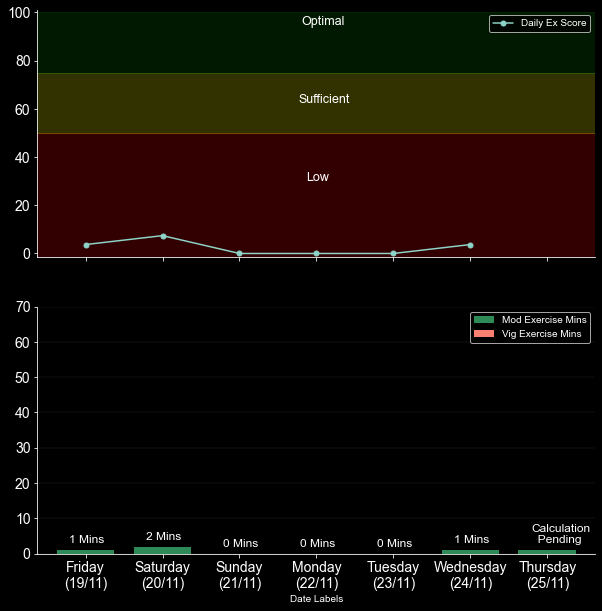

In [65]:
#MASTER VARIABLE TO CHANGE WHICH DECIDES HOW MANY OF THE PAST DAYS TO SHOW IN SLEEP + EXERCISE GRAPHS

fig, axes = plt.subplots(2,1, sharex=True,figsize=(10,10))
c_map_1 = {'Mod Exercise Mins':'seagreen', 'Vig Exercise Mins':'salmon'}

final_daily_reset[-num_of_days_to_show:-1].plot(kind='line', x='Date Labels', y= 'Daily Ex Score', ax=axes[0], 
                 marker='o', markersize=5)

sns.despine()

axes[1].set_ylim(0,70)
axes[0].set_ylim(-1.5,101)
# axes[0].set_ylabel('Daily Exercise\n Performance', rotation=0, labelpad =40, size=13)
# axes[1].set_ylabel('Exercise\nMins',rotation=0, labelpad =40,size=13)
# axes[1].set_xlabel('Date',labelpad=15, size=15)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
x = [-1]+[i for i in range(num_of_days_to_show)]+[num_of_days_to_show+1]
red_zone = [50]*(num_of_days_to_show+2)
yellow_zone= [75]*(num_of_days_to_show+2)


#Shading Areas behind the graph 
axes[0].fill_between(x, red_zone, -1.5,
                 facecolor="orange", # The fill color
                 color='red',       # The outline color
                 alpha=0.2)

axes[0].fill_between(x, red_zone, 75,
                 facecolor="orange", # The fill color
                 color='yellow',       # The outline color
                 alpha=0.2)

axes[0].fill_between(x, yellow_zone, 100,
                 facecolor="orange", # The fill color
                 color='green',       # The outline color
                 alpha=0.2)

colors = ['acquamarine', 'lime']

le= final_daily_reset[-num_of_days_to_show:].plot(kind='bar', stacked='True', 
                 x='Date Labels', y= ['Mod Exercise Mins','Vig Exercise Mins'],
                 ax=axes[1],width=bar_adj_2[num_of_days_to_show], rot=0, color=c_map_1)


for i in range(num_of_days_to_show):
    axes[1].annotate(ex_mins_labels[i],
    xy=(i-ant_adj[num_of_days_to_show],final_daily_reset['Exercise Mins'][-num_of_days_to_show:][i]+2),fontsize=12)

axes[0].annotate('Optimal', xy=(((axes[0].get_xlim()[0] + axes[0].get_xlim()[1])/2)-optimal_adj_2[num_of_days_to_show],95), size=12.5)
axes[0].annotate('Sufficient', xy=(((axes[0].get_xlim()[0] + axes[0].get_xlim()[1])/2)-sufficient_adj_2[num_of_days_to_show],62.5), size=12.5)
axes[0].annotate('Low', xy=(((axes[0].get_xlim()[0] + axes[0].get_xlim()[1])/2)-low_adj_2[num_of_days_to_show], 30), size=12.5)
axes[1].grid(axis='y', linewidth=0.07)


In [66]:
optimal_adj_3 = [0,-0.12,-0.09,-0.07,-0.07,0,0,0] 
sufficient_adj_3 = [0,-0.119,-0.085,-0.06,-0.04,0.04,0.04,0.04] 
low_adj_3 = [0,-0.125,-0.11,-0.1,-0.1,-0.08,-0.08,-0.07] 
bar_adj_3 = [0,0.05,0.125,0.175,0.2,0.25,0.35,0.45]

Text(2.8325, 30, 'Low')

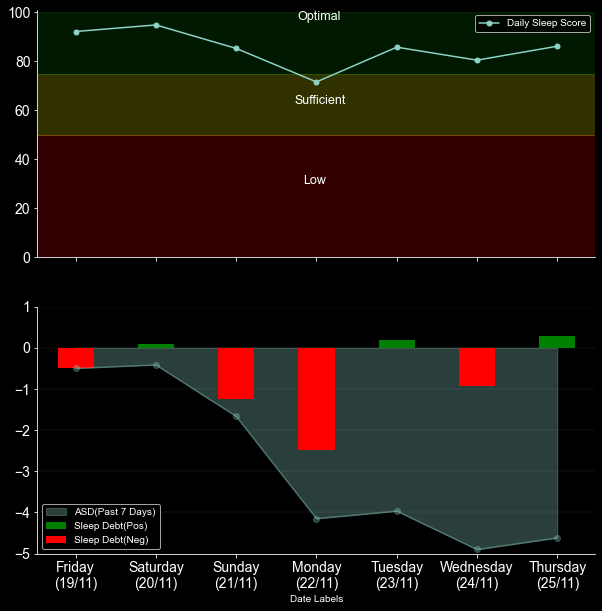

In [67]:
c_map = {'Sleep Debt(Pos)':'green', 'Sleep Debt(Neg)':'red'}

fig, axes = plt.subplots(2,1, sharex=True,figsize=(10,10))


final_daily_reset[-num_of_days_to_show:].plot(kind='line', x = 'Date Labels', y = 'Daily Sleep Score', ax=axes[0],
                 marker='o', markersize=5, )

final_daily_reset.plot.area(x='Date', y='ASD(Past 7 Days)', ax=axes[1], style='-o', alpha=0.3, stacked=False)

final_daily_reset[-num_of_days_to_show:].plot(kind='bar', x='Date Labels', y = ['Sleep Debt(Pos)','Sleep Debt(Neg)'], 
                                         width=bar_adj_3[num_of_days_to_show],align='center', ax=axes[1], color=c_map, stacked=True, 
                                        rot=0)


sns.despine()
axes[0].set_ylim(0,101)
axes[1].set_ylim(-5,1)
# axes[0].set_ylabel('Daily \n Sleep \n Performance', rotation=0, labelpad=30, size=13)
# axes[1].set_ylabel('Hours', rotation=0, 
#                    labelpad=25, size=13)
# axes[1].set_xlabel('Date',labelpad=15, size=15)
axes[1].grid(axis='y', linewidth=0.07)

axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

x = [-1]+[i for i in range(num_of_days_to_show)]+[num_of_days_to_show+1]
red_zone = [50]*(num_of_days_to_show+2)
yellow_zone= [75]*(num_of_days_to_show+2)


#Shading Areas behind the graph 
axes[0].fill_between(x, red_zone, 0,
                 facecolor="orange", # The fill color
                 color='red',       # The outline color
                 alpha=0.2)

axes[0].fill_between(x, red_zone, 75,
                 facecolor="orange", # The fill color
                 color='yellow',       # The outline color
                 alpha=0.2)

axes[0].fill_between(x, yellow_zone, 100,
                 facecolor="orange", # The fill color
                 color='green',       # The outline color
                 alpha=0.2)

axes[0].annotate('Optimal', xy=((axes[0].get_xlim()[0] + axes[0].get_xlim()[1]/2 -optimal_adj_3[num_of_days_to_show],97)), size=12.5)
axes[0].annotate('Sufficient', xy=((axes[0].get_xlim()[0] + axes[0].get_xlim()[1]/2 - sufficient_adj_3[num_of_days_to_show],62.5)), size=12.5)
axes[0].annotate('Low', xy=((axes[0].get_xlim()[0] + axes[0].get_xlim()[1]/2 - low_adj_3[num_of_days_to_show],30)), size=12.5)

# Final Weekly Dataset 

In [68]:
weekly_sleep_data

,Week Dates,Weekly Sleep Consistency,Weekly SDD,Weekly Sleep Debt(Hrs),Weekly Sleep Score
0,14/11/2021 to 20/11/2021,88.9,97.0,-0.9,94.6


In [69]:
weekly_ex_data

,Week,Total Ex Mins,Total Vig Mins,Total Mod Mins,Weekly Exercise Score,Average Exercise Mins per Day
0,14/11/2021 to 20/11/2021,62,23,39,45.3,8.9


In [70]:
# weekly_sleep_data
if len(weekly_ex_data) > 0:
    weekly_ex_data_final = weekly_ex_data.drop('Week', axis=1)
    weekly_data_all = pd.merge(weekly_sleep_data,weekly_ex_data_final, left_index=True, right_index=True)
    weekly_data_all.columns
else:
    weekly_data_all = pd.merge(weekly_sleep_data,weekly_ex_data, left_index=True, right_index=True)


In [71]:
#Export the dataset to csv 
# final_weekly.to_csv('Weekly Dataset from 'str(final_weekly['Week Dates'].iloc[0][:10]+ final_weekly['Week Dates'].iloc[-1][10:])+'.csv')

In [72]:
if len(weekly_data_all) > 0:
    final_weekly = weekly_data_all[['Week Dates','Weekly Sleep Debt(Hrs)','Total Ex Mins','Average Exercise Mins per Day','Weekly Sleep Consistency', 'Weekly SDD','Weekly Sleep Score','Weekly Exercise Score']]
    final_weekly
else:
    pass
# final_weekly = weekly_data_all[['Week Dates','Weekly Sleep Debt(Hrs)','Total Ex Mins','Average Exercise Mins per Day','Weekly Sleep Consistency', 'Weekly SDD','Weekly Sleep Score','Weekly Exercise Score']]
# final_weekly

# <u>Predicting Next Week's Performance</u>

In [73]:
# 1. REMOVE THIS STEP WHEN WE HAVE MORE DATA, AND INITIATE STEP 2 AND 3  
if len(weekly_data_all) > 0:
    daily_so_far = final_daily[:]
    weekly_so_far = final_weekly[:]
else:
    pass

## Importing and adding other data for the user



In [74]:
# 2. Importing previous weeks daily and weekly datatsets

# prev_weekly = pd.read_csv('')
# prev_daily = pd.read_csv('')

# 3. Append the previous weeks daily and weekly datasets

# weekly_so_far = prev_weekly.append(final_weekly).reset_index(drop=True)
# daily_so_far = prev_daily.append(final_weekly).reset_index(drop=True)


In [75]:
# final_daily[[i for i in final_daily.columns if 'D' in final_daily.columns ]]

# daily_so_far[['Date'] + [i for i in daily_so_far.columns if 'Daily' in i]]

In [76]:
if len(weekly_data_all) > 0:
    weekly_so_far[['Week Dates'] + [i for i in weekly_so_far.columns if 'Weekly' in i]]
else:
    pass


In [77]:
def avg_time(datetimes):
    total = sum(dt.hour * 3600 + dt.minute * 60 + dt.second for dt in datetimes)
    avg = total / len(datetimes)
    minutes, seconds = divmod(int(avg), 60)
    hours, minutes = divmod(minutes, 60)
    return datetime.combine(date(1900, 1, 1), time(hours, minutes, seconds))

In [78]:
def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + timedelta(0,rounding-seconds,-dt.microsecond)

## 1. Calculate all Sleep Midpoints and Cycle Starts  and Print Sleeping Chronotype

In [79]:
final_daily

,Date,Bed Time,Wake Time,Sleep Duration Hrs,Sleep Debt,Mod Exercise Mins,Vig Exercise Mins,Exercise Mins,Baseline HR,Daily SDD,Daily Sleep Consistency,Daily Sleep Score,Daily Ex Score,WT for PP,BT for PP,Sleep Debt(Neg),Sleep Debt(Pos),ASD
0,14/11/2021,21:18:00,06:06:00,8.800000,0.8,3,6,9,89,90.0,100.0,93,55.8,2021-11-14 06:06:00,2021-11-13 21:18:00,0,0.8,0.800000
1,15/11/2021,21:30:00,05:35:00,8.083333,0.0833333,1,0,1,97,99.0,93.3,97.3,3.7,2021-11-15 05:35:00,2021-11-14 21:30:00,0,0.0833333,0.883333
2,16/11/2021,21:51:00,05:34:00,7.716667,-0.283333,0,0,0,72,96.5,91.4,95,0,2021-11-16 05:34:00,2021-11-15 21:51:00,-0.283333,0,0.600000
3,17/11/2021,22:15:00,05:33:00,7.300000,-0.7,18,9,27,99,91.2,89.2,90.6,93.5,2021-11-17 05:33:00,2021-11-16 22:15:00,-0.7,0,-0.100000
4,18/11/2021,21:56:00,05:33:00,7.616667,-0.383333,14,8,22,78,93.4,95.0,93.9,87.9,2021-11-18 05:33:00,2021-11-17 21:56:00,-0.383333,0,-0.483333
5,19/11/2021,22:13:00,05:43:00,7.500000,-0.5,1,0,1,81,91.0,95.1,92.2,3.7,2021-11-19 05:43:00,2021-11-18 22:13:00,-0.5,0,-0.983333
6,20/11/2021,22:15:00,06:20:00,8.083333,0.0833333,2,0,2,62,95.8,92.8,94.9,7.4,2021-11-20 06:20:00,2021-11-19 22:15:00,0,0.0833333,-0.900000
7,21/11/2021,22:18:00,05:03:00,6.750000,-1.25,0,0,0,57,82.8,91.2,85.3,0,2021-11-21 05:03:00,2021-11-20 22:18:00,-1.25,0,-2.150000
8,22/11/2021,22:23:00,03:54:00,5.516667,-2.48333,0,0,0,79,65.6,85.5,71.6,0,2021-11-22 03:54:00,2021-11-21 22:23:00,-2.48333,0,-4.633333
9,23/11/2021,22:59:00,07:10:00,8.183333,0.183333,0,0,0,91,90.4,75.2,85.8,0,2021-11-23 07:10:00,2021-11-22 22:59:00,0,0.183333,-4.450000


In [80]:
#1. Calculate all Sleep Midpoints and Cycle Starts 

wake_times_dt_format
bed_times_dt_format
half_sleep_duration = [i for i in round(final_daily['Sleep Duration Hrs']/2,1)]

sleep_mp_cycle = pd.DataFrame()
sleep_midpoints = [] 

for i in range(len(final_daily)):
    sleep_midpoints.append(final_daily['BT for PP'].iloc[i].to_pydatetime() + timedelta(hours=int(half_sleep_duration[i]), minutes=int(float(str(half_sleep_duration[i])[1:])*60)))


sleep_mp_cycle['Date'] = [i.date() for i in sleep_midpoints]
sleep_mp_cycle['Day'] = [i.strftime('%A') for i in sleep_mp_cycle['Date']]
sleep_mp_cycle['Sleep Midpoint'] = [i.time() for i in sleep_midpoints]
future_dates = [datetime.strftime(i, '%d/%m/%Y') for i in sleep_midpoints]

#At this point when theres more data will split the sleep midpoints into each days category 
#to get a better reflection of how there cycle starts on different days 


#Currently set to round up to nearest hour could set to nearest half hour 
cycle_starts = [roundTime(i.to_pydatetime(),roundTo=3600) for i in final_daily['WT for PP']]

sleep_mp_cycle['Cycle Starts'] = [i.time() for i in cycle_starts]

#Avg Cycle Start Time 
avg_cycle_start_time = roundTime(avg_time(sleep_mp_cycle['Cycle Starts']),roundTo=1800)
print('Average Cycle Start Time = {}'.format(avg_cycle_start_time.time()),'\n')


#2. Print which sleeping chronotype they are
from statistics import mode
# Night Owls Sleep Midpoint = 6AM-12 PM, 21% of Population, -- DEFINITELY Evening Type
# Third Birds = 3-6 AM 65% of Population, -- Neither Type (Includes Moderate Morning and Moderate Evening Types) 
# Larks = 0-3 AM, 14% of Population -- DEFINITELY Morning Type

sleep_mp_cycle['Sleeping Chronotype'] = ''

three_am = datetime(6,1,2,3,0).time()
six_am = datetime(6,1,2,6,0).time()
midnight = datetime(6,1,2,0,0).time()

sleep_chrono_type = []
for i in range(len(sleep_midpoints)):
    
    if midnight > sleep_midpoints[i].time() > six_am:
        sleep_chrono_type.append('Night Owl')
        
    elif three_am > sleep_midpoints[i].time()> midnight:
        sleep_chrono_type.append('Lark')
        
    else:
        sleep_chrono_type.append('Third Bird')
        

sleep_mp_cycle['Sleeping Chronotype'] = sleep_chrono_type

print('Your Sleeping Type is {}'.format(mode(list(sleep_mp_cycle['Sleeping Chronotype'].values))))

sleep_mp_cycle

Average Cycle Start Time = 06:00:00 

Your Sleeping Type is Lark


,Date,Day,Sleep Midpoint,Cycle Starts,Sleeping Chronotype
0,2021-11-14,Sunday,01:42:00,06:00:00,Lark
1,2021-11-15,Monday,01:30:00,06:00:00,Lark
2,2021-11-16,Tuesday,01:45:00,06:00:00,Lark
3,2021-11-17,Wednesday,01:51:00,06:00:00,Lark
4,2021-11-18,Thursday,01:44:00,06:00:00,Lark
5,2021-11-19,Friday,02:01:00,06:00:00,Lark
6,2021-11-20,Saturday,02:15:00,06:00:00,Lark
7,2021-11-21,Sunday,01:42:00,05:00:00,Lark
8,2021-11-22,Monday,01:11:00,04:00:00,Lark
9,2021-11-23,Tuesday,03:05:00,07:00:00,Third Bird


### 1b. Calculate Avg Cycle Starts based on Day of the week 

In [81]:
#If i wanted to have more precise measuremetns and not rounded would need to change the 
##roundTime arguement above to less than 3600 - e.g. 1800 would be to half an a hour

#Finding average cycle starts based on the day of the week
days_of_week = list(set(sleep_mp_cycle['Day'].values))
avg_cycle_starts_per_day = {} 
dict_list_cycle_starts = {} 

act_cycle_starts= [i.to_pydatetime() for i in final_daily['WT for PP']]
sleep_mp_cycle['Actual Cycle Starts'] = act_cycle_starts

for i in range(len(days_of_week)):
    print(avg_time(sleep_mp_cycle[sleep_mp_cycle['Day'] == days_of_week[i]]['Cycle Starts']))
    print(roundTime(avg_time(sleep_mp_cycle[sleep_mp_cycle['Day'] == days_of_week[i]]['Actual Cycle Starts']),roundTo=1800))
    print('break', '\n')

#Calculating the average and rounding then storeing in Dictionary
for i in range(len(days_of_week)):
    #Dict with the averages for each day 
    avg_cycle_starts_per_day[days_of_week[i]]= roundTime(avg_time(sleep_mp_cycle[sleep_mp_cycle['Day'] == days_of_week[i]]['Actual Cycle Starts']), roundTo=1800)
    
    #Dict with list of cycle starts for each day 
    dict_list_cycle_starts[days_of_week[i]] = sleep_mp_cycle[sleep_mp_cycle['Day'] == days_of_week[i]]['Actual Cycle Starts']

    
    #Creating DF
avg_cycle_per_day= pd.DataFrame.from_dict(data = {'Avg Cycle Start Time':[i.time() for i in avg_cycle_starts_per_day.values()], 
                               'Day':avg_cycle_starts_per_day.keys()})

avg_cycle_per_day


1900-01-01 06:30:00
1900-01-01 06:30:00
break 

1900-01-01 06:00:00
1900-01-01 06:00:00
break 

1900-01-01 05:30:00
1900-01-01 05:30:00
break 

1900-01-01 06:00:00
1900-01-01 05:30:00
break 

1900-01-01 06:00:00
1900-01-01 06:30:00
break 

1900-01-01 06:00:00
1900-01-01 05:30:00
break 

1900-01-01 05:00:00
1900-01-01 04:30:00
break 



,Avg Cycle Start Time,Day
0,06:30:00,Tuesday
1,06:00:00,Thursday
2,05:30:00,Sunday
3,05:30:00,Wednesday
4,06:30:00,Saturday
5,05:30:00,Friday
6,04:30:00,Monday


## 3. Combine Hardcoded values to the Sleep + Exercise Index to get values for each our 

In [82]:
## ThirdBird Graph preset built of someone who's sleep midpoint is 3 and sleeps total of 8 hours so cycle starts at 7 
### Will have to shift numbers accordingly
### e.g. if someones cycles starts at 5 and are 3rdbird then has to shift by -2
#### Amount to shift array = cycle start - 7  
##### From 7AM to 6AM(Next Day)
lark_third_bird_hardcoded = [50,57.5,65,75,90,100,90,75,50,60,70,80,85,80,70,60,50,45,30,25,25,25,30,40]


## NightOwl Graph preset built of someone who's sleep midpoint is 6 and sleeps total of 8 hours so cycle starts at 10 
### Will have to shift numbers accordingly
### e.g. if someones cycles starts at 7 and are nightowl then has to shift by +1
#### Amount to shift array = cycle start - 6  
#####These start from 5AM to 4AM(Next Day)
night_owl_harcoded = [25.0,25.0,30.0,45.0,50.0,60.0,70.0,80.0,85.0,80.0,70.0,60.0,50.0,75.0,90.0,100.0,90.0,75.0,65.0,57.5,50.0,40.0,30.0,25.0]

last_7_days = final_daily[-6:]
prdikt_perf_capacity = round((last_7_days['Daily Sleep Score'].values[-1]*0.7)+ (weekly_ex_score(mod_mins = sum(final_daily['Mod Exercise Mins']), vig_mins = sum(final_daily['Vig Exercise Mins']))*0.3),1)

print('Sleep Performance = ', last_7_days['Daily Sleep Score'].values[-1])
print('Ex Performance = ', weekly_ex_score(mod_mins = sum(final_daily['Mod Exercise Mins']), vig_mins = sum(final_daily['Vig Exercise Mins'])))
print('Prdikt Perforamnce Capacity = ', prdikt_perf_capacity)

# hrly_perf_capacity = [round((prdikt_perf_capacity*0.01*i),1) for i in lark_third_bird_hardcoded]
# hrly_perf_capacity

lisst = list(sleep_mp_cycle['Sleeping Chronotype'].values)
print('Mode =',mode(lisst))

#Deciding which hourly performance capacity values to use based on most occuring 
##This step may need to change to when graphs are produced 
###My logic thinks if you are more than often sleeping like a lark then your circadian ryhytm will adjust to this 

if mode(lisst) == 'Lark':
    hrly_perf_capacity = [round((prdikt_perf_capacity*0.01*i),1) for i in lark_third_bird_hardcoded]

elif mode(lisst) == 'Third Bird':
    hrly_perf_capacity = [round((prdikt_perf_capacity*0.01*i),1) for i in lark_third_bird_hardcoded]
else:
    hrly_perf_capacity = [round((prdikt_perf_capacity*0.01*i),1) for i in night_owl_harcoded]


hrly_perf_capacity

Sleep Performance =  86.2
Ex Performance =  46.4
Prdikt Perforamnce Capacity =  74.3
Mode = Lark


[37.2,
 42.7,
 48.3,
 55.7,
 66.9,
 74.3,
 66.9,
 55.7,
 37.2,
 44.6,
 52.0,
 59.4,
 63.2,
 59.4,
 52.0,
 44.6,
 37.2,
 33.4,
 22.3,
 18.6,
 18.6,
 18.6,
 22.3,
 29.7]

## 4. Then apply deteoriation factor to calculate upper and lower bounds for each day value every day 

In [83]:
deteoriation_factor = [0.01,0.025,0.05, 0.075,0.1,0.125,0.15]
print(deteoriation_factor)

upper_bound = [round((deteoriation_factor[3]*i)+i,1) for i in hrly_perf_capacity]
lower_bound = [round(i-(deteoriation_factor[3]*i),1) for i in hrly_perf_capacity]


[0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15]


## 5. Apply a regplot with the shaded areas either side of the line being the standard deviation

In [84]:
#NEED TO ADD IN A WAY OF DECREASING THE DETORIATION FACTOR FOR EVERY EXTRA WEEK OF DATA 

In [85]:
def plot_perf_curve(y, deteoriation_factor):
    
    upper_bound = [round((deteoriation_factor[2]*j)+j,1) for j in hrly_perf_capacity]
    lower_bound = [round(j-(deteoriation_factor[2]*j),1) for j in hrly_perf_capacity]
    
    x = [str((cycle_starts[-1] + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
    
    plt.figure(figsize=(25,15))
    plt.ylim(0,100)
    plt.scatter(x,y, s=150, c=y,cmap ='RdYlGn',alpha=1)
#     cbar = plt.colorbar(extend='both', ticks=[0,10,20,30,40,50,60,70,80,90,100])
#     cbar.ax.tick_params(labelsize=20)
#     cbar.ax.set_ylabel('Predicted\nPerformance\nCapacity', size=25, labelpad=90, rotation = 0)
#     plt.xlabel('Time',size=25, labelpad= 20)
#     plt.ylabel('Predicted\nPerformance\nCapacity', size =25, rotation=0, labelpad =90)
    plt.xticks(size=25, rotation=45)
    plt.yticks(ticks = [i for i in range(0,110,10)],labels =[i for i in range(0,110,10)], size=25)
    plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, color='Purple')
    plt.title('Today\'s Predicted Performance',size=35)
    sns.despine()
    plt.grid(axis='x', linewidth=0.07)
    plt.show()

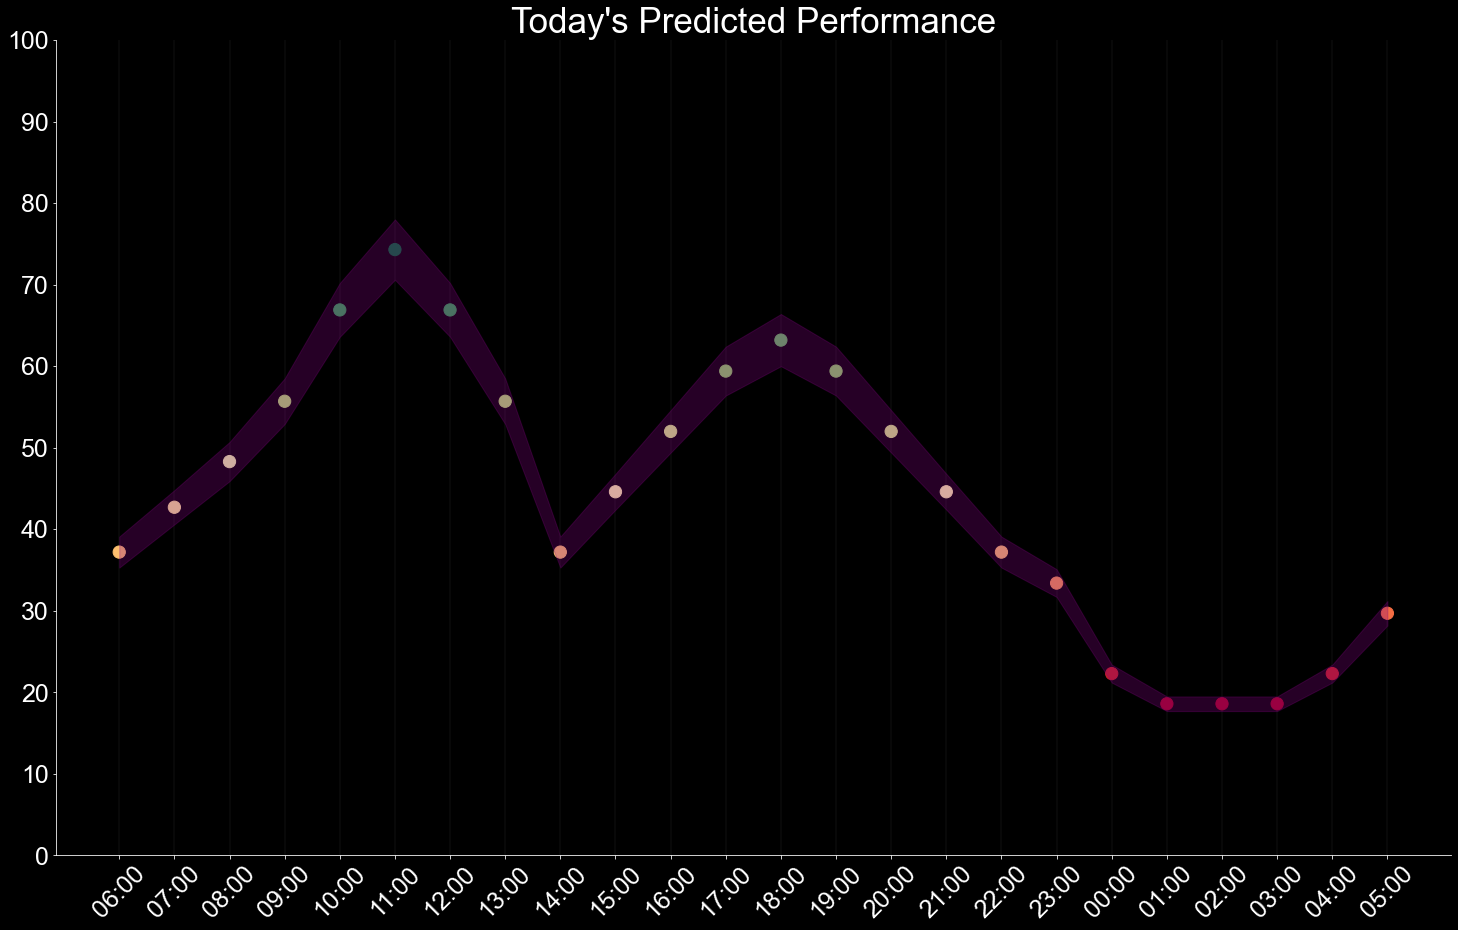

In [86]:
plot_perf_curve(y=hrly_perf_capacity,deteoriation_factor=deteoriation_factor)

## Plot every single performance curve 

def plot_daily_perf_curves(y, deteoriation_factor):
    sns.set_context("paper")
    for i in range(len(sleep_mp_cycle)):
    
        if sleep_mp_cycle['Sleeping Chronotype'].iloc[i] == 'Lark':
            upper_bound = [round((deteoriation_factor[i]*j)+j,1) for j in hrly_perf_capacity]
            lower_bound = [round(j-(deteoriation_factor[i]*j),1) for j in hrly_perf_capacity]
            
            x = [str((cycle_starts[i] + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
            plt.figure(figsize=(25,15))
            plt.ylim(0,110)
            plt.scatter(x,y, s=100, c=y,cmap ='RdYlGn',alpha=5)
            plt.xlabel('Time',size=30, labelpad= 20)
            plt.ylabel('Performance\nCapacity', size =30, rotation=0, labelpad =90)
            plt.xticks(size=20, rotation=45)
            plt.yticks(ticks = [i for i in range(0,120,10)],labels =[i for i in range(0,110,10)]+ [''], size=20)
            plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, color='Purple')
            plt.title('Predicted Performance for ' + str(sleep_mp_cycle['Date'].iloc[-1] + timedelta(hours=24*(i+1))), size=30)
            sns.despine()
            plt.show()

        else:
            #Creating X values for graphs for each cycle  
            upper_bound = [round((deteoriation_factor[i]*j)+j,1) for j in hrly_perf_capacity]
            lower_bound = [round(i-(deteoriation_factor[i]*j),1) for j in hrly_perf_capacity]
            
            x = [str((cycle_starts[i] + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
            plt.figure(figsize=(25,15))
            plt.ylim(0,110)
            plt.scatter(x,y, s=100, c=y,cmap ='RdYlGn',alpha=5)
            plt.xlabel('Time',size=30, labelpad= 20)
            plt.ylabel('Performance\nCapacity', size =30, rotation=0, labelpad =90)
            plt.xticks(size=20, rotation=45)
            plt.yticks(ticks = [i for i in range(0,120,10)],size=20)
            plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, color='Purple')
            sns.despine()
            plt.show()

plot_daily_perf_curves(y=hrly_perf_capacity, deteoriation_factor=deteoriation_factor)

## Calendar Heatmap

In [87]:
avg_cycle_starts_per_day

{'Tuesday': datetime.datetime(1900, 1, 1, 6, 30),
 'Thursday': datetime.datetime(1900, 1, 1, 6, 0),
 'Sunday': datetime.datetime(1900, 1, 1, 5, 30),
 'Wednesday': datetime.datetime(1900, 1, 1, 5, 30),
 'Saturday': datetime.datetime(1900, 1, 1, 6, 30),
 'Friday': datetime.datetime(1900, 1, 1, 5, 30),
 'Monday': datetime.datetime(1900, 1, 1, 4, 30)}

In [88]:
#Built this dataframe so now we will be taking the cycle start from the avg time we calculate for each day 
#Over time this should get more and more accurate

next7dates = [sleep_mp_cycle['Date'].iloc[-1] + timedelta(hours=24*(i+1)) for i in range(0,7)]

next7_fut_dates = [datetime.strftime(i, '%d/%m') for i in next7dates]

next7days = [i.strftime('%A') for i in next7dates]

x_labels = [next7days[i] + '\n' + '('+ next7_fut_dates[i]+ ')' for i in range(len(next7days))]

next7_df = pd.DataFrame(data={'Days':next7days, 'Dates':next7dates})

next7_df['Cycle Start'] = ''

#If we don't have the seperate date then use the avg 
for i in range(len(next7_df['Days'])):
    if next7_df['Days'][i] in avg_cycle_starts_per_day.keys():
        next7_df['Cycle Start'].iloc[i] = avg_cycle_starts_per_day[next7_df['Days'][i]]
    else:
        print('{} not in data so will use avg = {}'.format(next7_df['Days'][i],avg_cycle_start_time))
        next7_df['Cycle Start'].iloc[i] = avg_cycle_start_time
    
next7_df

,Days,Dates,Cycle Start
0,Friday,2021-11-26,1900-01-01 05:30:00
1,Saturday,2021-11-27,1900-01-01 06:30:00
2,Sunday,2021-11-28,1900-01-01 05:30:00
3,Monday,2021-11-29,1900-01-01 04:30:00
4,Tuesday,2021-11-30,1900-01-01 06:30:00
5,Wednesday,2021-12-01,1900-01-01 05:30:00
6,Thursday,2021-12-02,1900-01-01 06:00:00


In [89]:
# from itertools import chain

# x = [str((cycle_starts[0] + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
# y = hrly_perf_capacity

# calendar_df = pd.DataFrame({'Time': x, 'Performance Capacity':y})
# dates = [str(sleep_mp_cycle['Date'].iloc[-1] + timedelta(hours=24*(i+1))) for i in range(len(sleep_mp_cycle))]

# #Creating long list for 
# x_list = []

# for i in range(0,7):
#     x_list.append([str((roundTime(next7_df['Cycle Start'].values[i],roundTo=3600) + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))])

# x_new = list(chain.from_iterable(x_list))
# y_new = hrly_perf_capacity * 7

# calendar_df = pd.DataFrame({'Time': x_new, 'Performance Capacity':y_new})
# calendar_df['Date'] = list(chain.from_iterable([[next7_fut_dates[i]]*24 for i in range(7)]))
# calendar_final = calendar_df.pivot('Time', 'Date')

# #Find average wake time and base cycle on that 
# new_axis = [str((avg_cycle_start_time + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
# calendar_final= calendar_final.reindex(new_axis)

# #Plotting Heatmap  
# plt.figure(figsize=(15,10))
# ax_1 = sns.heatmap(calendar_final, cmap = 'RdYlGn', linewidths=0.01, linecolor='black', annot=False,
#                   cbar_kws={'ticks': [0,10,20,30,40,50,60,70,80,90,100],
#                             'extend':'both'})

# plt.ylabel('Time', rotation=0, labelpad=30, size=17)
# plt.yticks(rotation=0, size=15)

# plt.xlabel('Date', rotation = 0, labelpad = 10, size=17)
# plt.xticks(ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5],labels =x_labels , rotation = 0, size=15)
# plt.title('Predicted Performance Capacity Over the Next 7 Days', size=18)

# ax_1.figure.axes[-1].set_ylabel('Performance\nCapacity', size=15, labelpad=50, rotation = 0)
# cax = plt.gcf().axes[-1]
# cax.tick_params(labelsize=13)

# plt.show()

In [90]:
#Creating New Calendar that does everything by half hour 
daypredict_fix = pd.DataFrame()

daypredict_fix['Hrly Capacity'] = hrly_perf_capacity

time_hours= [str((avg_cycle_start_time + timedelta(hours=j)).time())[:5] for j in range(len(hrly_perf_capacity))]
daypredict_fix['Hours'] = time_hours

daypredict_fix['New Hours'] = ''

new_hours_lst = [] 
for i in range(len(hrly_perf_capacity)):
    new_hours_lst.append(daypredict_fix['Hours'][i][:2] + ':30')
    
daypredict_fix['New Hours'] = new_hours_lst

perf_capac_vals= [round((hrly_perf_capacity[i] + hrly_perf_capacity[i+1])/2,1) for i in range(23)] + [round((hrly_perf_capacity[0] + hrly_perf_capacity[-1])/2,1)]

daypredict_fix['New Hours PC']= perf_capac_vals

final_pc = [] 
for i in range(len(daypredict_fix)):
    final_pc.append(daypredict_fix['Hrly Capacity'][i])
    final_pc.append(daypredict_fix['New Hours PC'][i])

In [91]:
daypredict_fix['New Hours'] = new_hours_lst

perf_capac_vals= [round((hrly_perf_capacity[i] + hrly_perf_capacity[i+1])/2,1) for i in range(23)] + [round((hrly_perf_capacity[0] + hrly_perf_capacity[-1])/2,1)]

daypredict_fix['New Hours PC']= perf_capac_vals

final_pc = [] 
for i in range(len(daypredict_fix)):
    final_pc.append(daypredict_fix['Hrly Capacity'][i])
    final_pc.append(daypredict_fix['New Hours PC'][i])


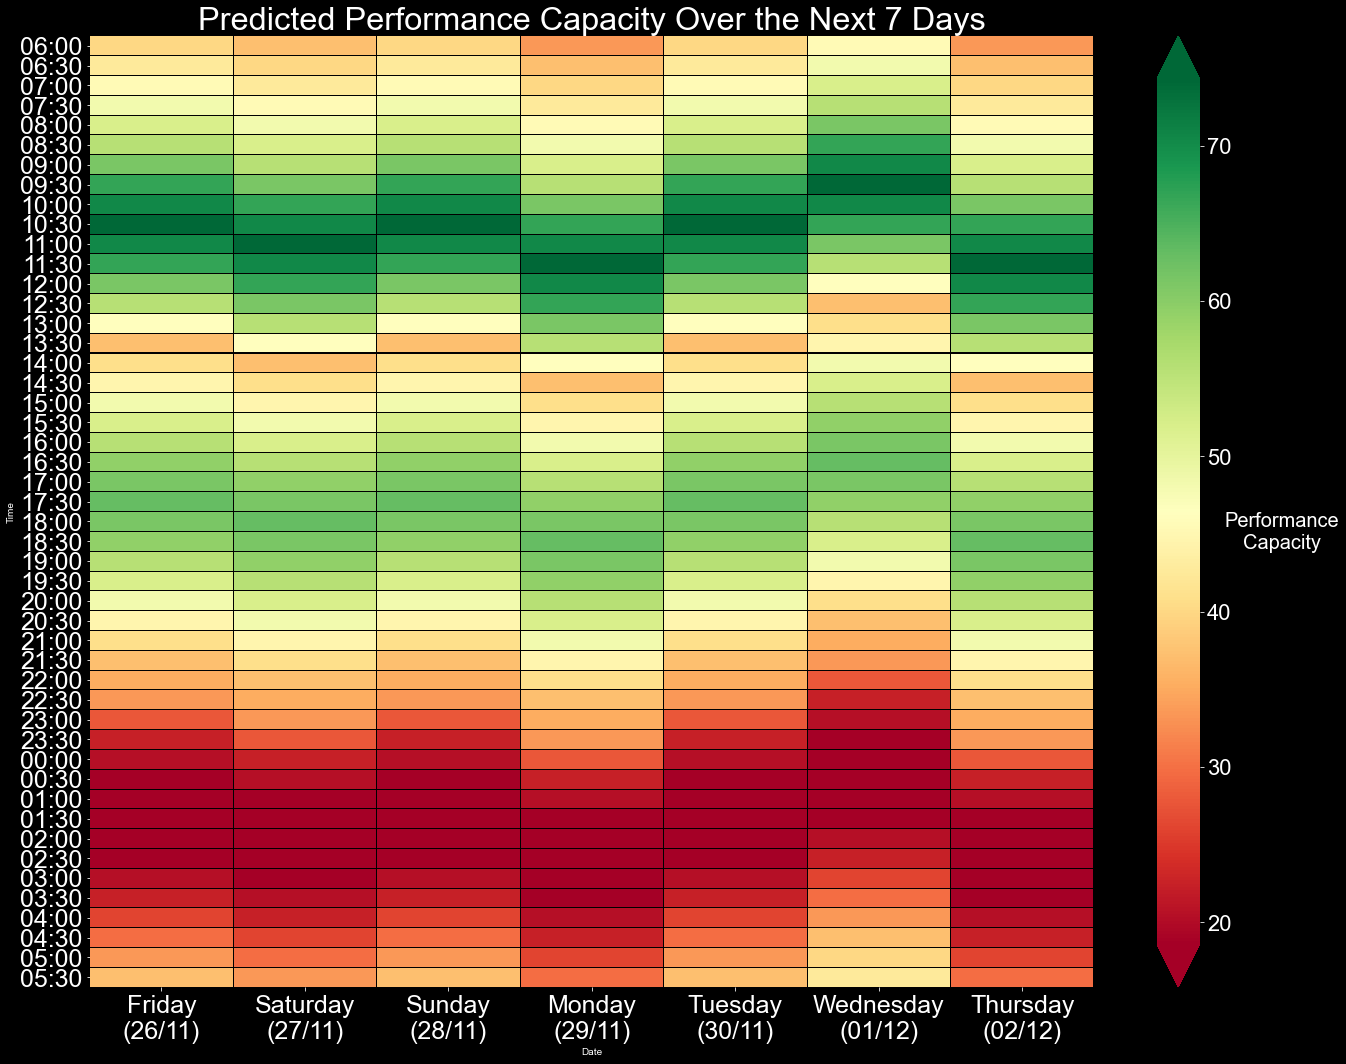

In [92]:
z_list = [] 
for i in range(0,7):
    z_list.append([str((next7_df['Cycle Start'].values[i] + timedelta(hours=j/2)).time())[:5] for j in range(len(final_pc))])

from itertools import chain

x = [str((cycle_starts[0] + timedelta(hours=j)).time())[:5] for j in range(len(final_pc))]
y = final_pc

calendar_df = pd.DataFrame({'Time': x, 'Performance Capacity':y})
dates = [str(sleep_mp_cycle['Date'].iloc[-1] + timedelta(hours=24*(i+1))) for i in range(len(sleep_mp_cycle))]

#Creating long list for 

x_new = list(chain.from_iterable(z_list))
y_new = final_pc * 7

calendar_df = pd.DataFrame({'Time': x_new, 'Performance Capacity':y_new})
calendar_df['Date'] = list(chain.from_iterable([[next7_fut_dates[i]]*len(final_pc) for i in range(7)]))
calendar_final = calendar_df.pivot(columns='Date', index='Time', values='Performance Capacity')

#Find average wake time and base cycle on that 
new_axis = [str((avg_cycle_start_time + timedelta(hours=j/2)).time())[:5] for j in range(len(final_pc))]
calendar_final= calendar_final.reindex(new_axis)

#Plotting Heatmap  
plt.figure(figsize=(22.5,17.5))
ax_1 = sns.heatmap(calendar_final, cmap = 'RdYlGn', linewidths=0.01, linecolor='black', annot=False,
                  cbar_kws={'ticks': [0,10,20,30,40,50,60,70,80,90,100],
                            'extend':'both'})

# plt.ylabel('Time', rotation=0, labelpad=50, size=25)
plt.yticks(rotation=0, size=25)

# plt.xlabel('Date', rotation = 0, labelpad = 20, size=25)
plt.xticks(ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5],labels =x_labels , rotation = 0, size=25)
plt.title('Predicted Performance Capacity Over the Next 7 Days', size=32.5)

ax_1.figure.axes[-1].set_ylabel('Performance\nCapacity', size=20, labelpad=50, rotation = 0)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=22)
plt.show()

# Values for Report

In [112]:
print('Sleep Data')
print('=========================================================================================================', '\n')

print('Sleep Type')
print('-----------------', '\n')
print('Your Sleeping Type is {}'.format(mode(list(sleep_mp_cycle['Sleeping Chronotype'].values))), '\n'*2)

print('Sleep Performance')
print('-----------------', '\n')
print('Todays Daily Sleep Performance = {}'.format(round(final_daily['Daily Sleep Score'].values[-1])))
print('Sleep Perforamnce Typical Range = {}'.format(typical_range_sp), '\n')


print('Sleep Consistency')
print('-----------------', '\n')

print('Sleep Consistency = {}'.format(past7_days_Sleep_cons), '\n'*2)

print('Sleep Duration and Debt')
print('-----------------------', '\n')
print('Over Last {} Days: '.format(num_of_days_to_show))
print('Avg Bed Time: {}'.format(avg_bed_time_past7.time()))
print('Avg Wake Time: {}'.format(avg_wake_time_past7.time()), '\n')
print('Last Nights Sleep Duration = {}'.format(str(final_daily['Sleep Duration Hrs'].values[-1])[0] + ' Hours ' + str(int(float(str(final_daily['Sleep Duration Hrs'].values[-1])[1:])*60)) + ' mins'))
print('Sleep Duration Typical Range = {}'.format(typical_range), '\n')
print('All Data: Avg Sleep Duration= {}'.format(avg_sleep_string_form))
print('Past {} Days: Avg Sleep Duration = {}'.format(len(sleep_data_final['Sleep Duration Hrs'][-7:]), avg_sleep_string_form_past7),'\n')

print('Accumulated Sleep Debt in last 7 days = {} hours {} mins'.format(asd_hrs,asd_mins ), '\n')

if asd_hrs >= 0:
    print('Tomorrows sleep need = {}'.format(str(8) + ' Hours ' ))
    print('Tomorrows sleep need bed time = {}'.format((avg_wake_time_past7 - timedelta(hours=8)).time()),'\n')
elif asd_hrs < 0: 
    print('Tomorrows sleep need = {}'.format(str((8 + asd_hrs*-1)) + ' Hours ' + str(asd_mins) + ' Mins'))
    print('Tomorrows sleep need bed time = {}'.format((avg_wake_time_past7 - timedelta(hours=8+(asd_hrs*-1), minutes=asd_mins)).time()),'\n')
    
# print('Tomorrows sleep need bed time = {}'.format((avg_wake_time_past7 - timedelta(hours=8+(asd_hrs*-1), minutes=asd_mins)).time()),'\n')
print('Sleep Need over the next 7 days = {}'.format(SN_strin_form))
print('Next 7 days sleep need bed time = {} '.format((avg_wake_time_past7 - timedelta(hours=sleep_need_hrs)).time()), '\n')
print('\n')

print('Exercise Data')
print('========================================================================================================', '\n')
print('Total Moderate Ex Mins over last {} days = {} '.format(num_of_days_to_show, sum(mod_ex_mins)))
print('Total Vigorous Ex Mins over last {} days = {}'.format(num_of_days_to_show, sum(vig_ex_mins)), '\n'*2)

print('Predicted Data')
print('========================================================================================================', '\n')
print('Peak Predicted Perforamnce = {}'.format(round(max(hrly_perf_capacity))))

Sleep Data

Sleep Type
----------------- 

Your Sleeping Type is Lark 


Sleep Performance
----------------- 

Todays Daily Sleep Performance = 86
Sleep Perforamnce Typical Range = 82 - 96 

Sleep Consistency
----------------- 

Sleep Consistency = 82.4 


Sleep Duration and Debt
----------------------- 

Over Last 7 Days: 
Avg Bed Time: 22:24:25
Avg Wake Time: 05:44:51 

Last Nights Sleep Duration = 8 Hours 16 mins
Sleep Duration Typical Range = 6 Hours 46 mins - 8 Hours 25 mins 

All Data: Avg Sleep Duration= 7 Hours 36 Mins
Past 7 Days: Avg Sleep Duration = 7 Hours 18 Mins 

Accumulated Sleep Debt in last 7 days = 4 hours 18 mins 

Tomorrows sleep need = 8 Hours 
Tomorrows sleep need bed time = 21:44:51 

Sleep Need over the next 7 days = 8 Hours 0 Mins
Next 7 days sleep need bed time = 21:44:51  



Exercise Data

Total Moderate Ex Mins over last 7 days = 41 
Total Vigorous Ex Mins over last 7 days = 23 


Predicted Data

Peak Predicted Perforamnce = 74
